## Income Transition Matrices Using NLSY Data

In [27]:
from bokeh.plotting import figure, output_file, show
import numpy as np
import pandas as pd
import xlrd
from bokeh.layouts import widgetbox
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, MultiSelect
from bokeh.plotting import figure, output_file, show
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed,interact_manual
import ipywidgets as wg
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [28]:
nlsydata = pd.read_csv('/Users/fulinguo/Desktop/IncomeTrans/Data/income_nlsy/income_nlsy.csv')

In [29]:
nlsydata=nlsydata.rename(columns={'R2444700': 'inc87','R2870200':'inc88','R3074000':'inc89',\
                              'R3400700':'inc90', 'R3656100':'inc91','R4006600':'inc92',\
                                 'R4417700':'inc93', 'R5080700':'inc94','R5166000':'inc96',\
                                 'R6478700':'inc98', 'R7006500':'inc00','R7703700':'inc02',\
                                 'R8496100':'inc04', 'T0987800':'inc06','T2210000':'inc08',\
                                 'T3107800':'inc10', 'T4112300':'inc12','T5022600':'inc14',\
                                 'T5770800':'inc16'})

In [30]:
nlsydata=nlsydata.rename(columns={'T2272800':'edu10', 'T3212900':'edu12','T4201100':'edu14',\
                                 'T5176100':'edu16','T1214300':'edu08','T0014400':'edu06','R0214800':'gender',\
                                 'R0214700':'race'})

In [31]:
nlsydata['edu']=nlsydata[['edu06','edu08','edu10','edu12','edu14','edu16']].max('columns')

In [32]:
nlsydata=nlsydata.rename(columns={'R5081700':'age94', 'R5167000':'age96','R6479800':'age98','T5771500':'age16',\
                                 'R7007500':'age00','R7704800':'age02','R8497200':'age04','T0989000':'age06',\
                                 'T2210800':'age08','T3108700':'age10','T4113200':'age12','T5023600':'age14'})

In [33]:
nlsydata['incrank94']=nlsydata[nlsydata['inc94']>=0].inc94.rank(pct=True)
nlsydata['incrank96']=nlsydata[nlsydata['inc96']>=0].inc96.rank(pct=True)
nlsydata['incrank98']=nlsydata[nlsydata['inc98']>=0].inc98.rank(pct=True)
nlsydata['incrank00']=nlsydata[nlsydata['inc00']>=0].inc00.rank(pct=True)
nlsydata['incrank02']=nlsydata[nlsydata['inc02']>=0].inc02.rank(pct=True)
nlsydata['incrank04']=nlsydata[nlsydata['inc04']>=0].inc04.rank(pct=True)
nlsydata['incrank06']=nlsydata[nlsydata['inc06']>=0].inc06.rank(pct=True)
nlsydata['incrank08']=nlsydata[nlsydata['inc08']>=0].inc08.rank(pct=True)
nlsydata['incrank10']=nlsydata[nlsydata['inc10']>=0].inc10.rank(pct=True)
nlsydata['incrank12']=nlsydata[nlsydata['inc12']>=0].inc12.rank(pct=True)
nlsydata['incrank14']=nlsydata[nlsydata['inc14']>=0].inc14.rank(pct=True)
nlsydata['incrank16']=nlsydata[nlsydata['inc16']>=0].inc16.rank(pct=True)

In [34]:
incindex=['incrank94','incrank96','incrank98','incrank00','incrank02','incrank04','incrank06','incrank08',\
         'incrank10', 'incrank12', 'incrank14', 'incrank16']
ageindex=['age94','age96','age98','age00','age02','age04','age06','age08','age10','age12','age14','age16']
urbanindex=['R5083100','R5168400','R6481200','R7008900','R7706200','R8498600','T0990400',\
           'T2212200','T3110100','T4114600','T5025900','T5774000']
childindex=['R5087500','R5172800','R6486400','R6839600','R7548600','R8255400','T0857100',\
            'T2015100','T2998600','T3942500','T4876800','T5593000']
healthindex=['R4961400','R5616900','R6343900','R6887500','R7597900','R8297700','T0896000',\
             'T2051800','T3023100','T3953300','T4891000','T5594100']

### Income transition matrices of all people

In [35]:
med_mar1=[[0]*16]*26
med_mar1=np.array(med_mar1)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_mar1[int(age1)-30][type]+=1

In [36]:
med_mar1=med_mar1.reshape(26,4,4)
print('Number matrices:\n',med_mar1)
markov1=[]
for i in range(len(med_mar1)):
    for j in range(4):
        sum_quan=sum(med_mar1[i][j])
        med_mar1[i][j]/max(sum_quan,0.1)
        markov1.append(med_mar1[i][j]/max(sum_quan,0.1))
markov1=np.array(markov1)
markov1=markov1.reshape(26,4,4)

Number matrices:
 [[[132  48  15   1]
  [ 29 119  46  23]
  [  6  31 104  48]
  [  8  10  23 111]]

 [[210  60   9   3]
  [ 58 169  72  12]
  [ 24  42 170  60]
  [  3  11  49 189]]

 [[243  92  24  10]
  [ 65 223  84  30]
  [ 27  80 247  88]
  [  8  22  62 308]]

 [[338 104  31   8]
  [ 83 276  91  23]
  [ 26  89 283  99]
  [ 16  22  77 387]]

 [[364 110  34  16]
  [122 331 117  24]
  [ 28 102 371 111]
  [ 16  30 127 427]]

 [[396 112  33  14]
  [ 81 383 114  30]
  [ 30  99 369 104]
  [ 21  27 113 464]]

 [[478 136  32  12]
  [117 390 152  28]
  [ 46 141 451 148]
  [ 15  31 130 543]]

 [[432 136  27  18]
  [114 432 135  27]
  [ 36 139 414 138]
  [ 17  24 134 539]]

 [[484 139  36  15]
  [121 407 134  26]
  [ 37 116 436 149]
  [ 21  36 123 544]]

 [[444 114  24   6]
  [136 361 124  27]
  [ 26 106 409 118]
  [ 18  27 115 517]]

 [[483 129  24  28]
  [128 411 145  33]
  [ 28 120 436 119]
  [ 10  36 114 571]]

 [[500 147  33  20]
  [111 422 139  37]
  [ 25 126 464 158]
  [ 15  36 114 568]]

In [37]:
print(markov1)

[[[0.67346939 0.24489796 0.07653061 0.00510204]
  [0.13364055 0.5483871  0.21198157 0.10599078]
  [0.03174603 0.16402116 0.55026455 0.25396825]
  [0.05263158 0.06578947 0.15131579 0.73026316]]

 [[0.74468085 0.21276596 0.03191489 0.0106383 ]
  [0.18649518 0.54340836 0.23151125 0.03858521]
  [0.08108108 0.14189189 0.57432432 0.2027027 ]
  [0.01190476 0.04365079 0.19444444 0.75      ]]

 [[0.65853659 0.24932249 0.06504065 0.02710027]
  [0.16169154 0.55472637 0.20895522 0.07462687]
  [0.06108597 0.18099548 0.55882353 0.19909502]
  [0.02       0.055      0.155      0.77      ]]

 [[0.7027027  0.21621622 0.06444906 0.01663202]
  [0.17547569 0.58350951 0.19238901 0.04862579]
  [0.05231388 0.17907445 0.5694165  0.19919517]
  [0.03187251 0.0438247  0.15338645 0.77091633]]

 [[0.69465649 0.20992366 0.0648855  0.03053435]
  [0.20538721 0.55723906 0.1969697  0.04040404]
  [0.04575163 0.16666667 0.60620915 0.18137255]
  [0.02666667 0.05       0.21166667 0.71166667]]

 [[0.71351351 0.2018018  0.059

In [38]:
import matplotlib.pyplot as plt
q11=[]
q22=[]
q33=[]
q44=[]
for i in markov1:
    q11.append(i[0][0])
    q22.append(i[1][1])
    q33.append(i[2][2])
    q44.append(i[3][3])
age=np.arange(30,30+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q22,label='p22')
plt.plot(age,q33,label='p33')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Pxx')
plt.legend()

<IPython.core.display.Javascript object>

Findings:
1. As people get older, their income level becomes more stable.
2. p11 and p44 are much higher than p22 and p33 in all ages, suggesting that the poorest and the wealthiest people have more stable income level than the people whose income level is in the middle.
3. p22 and p33 increase more dramatically than p11 and p44.

<IPython.core.display.Javascript object>


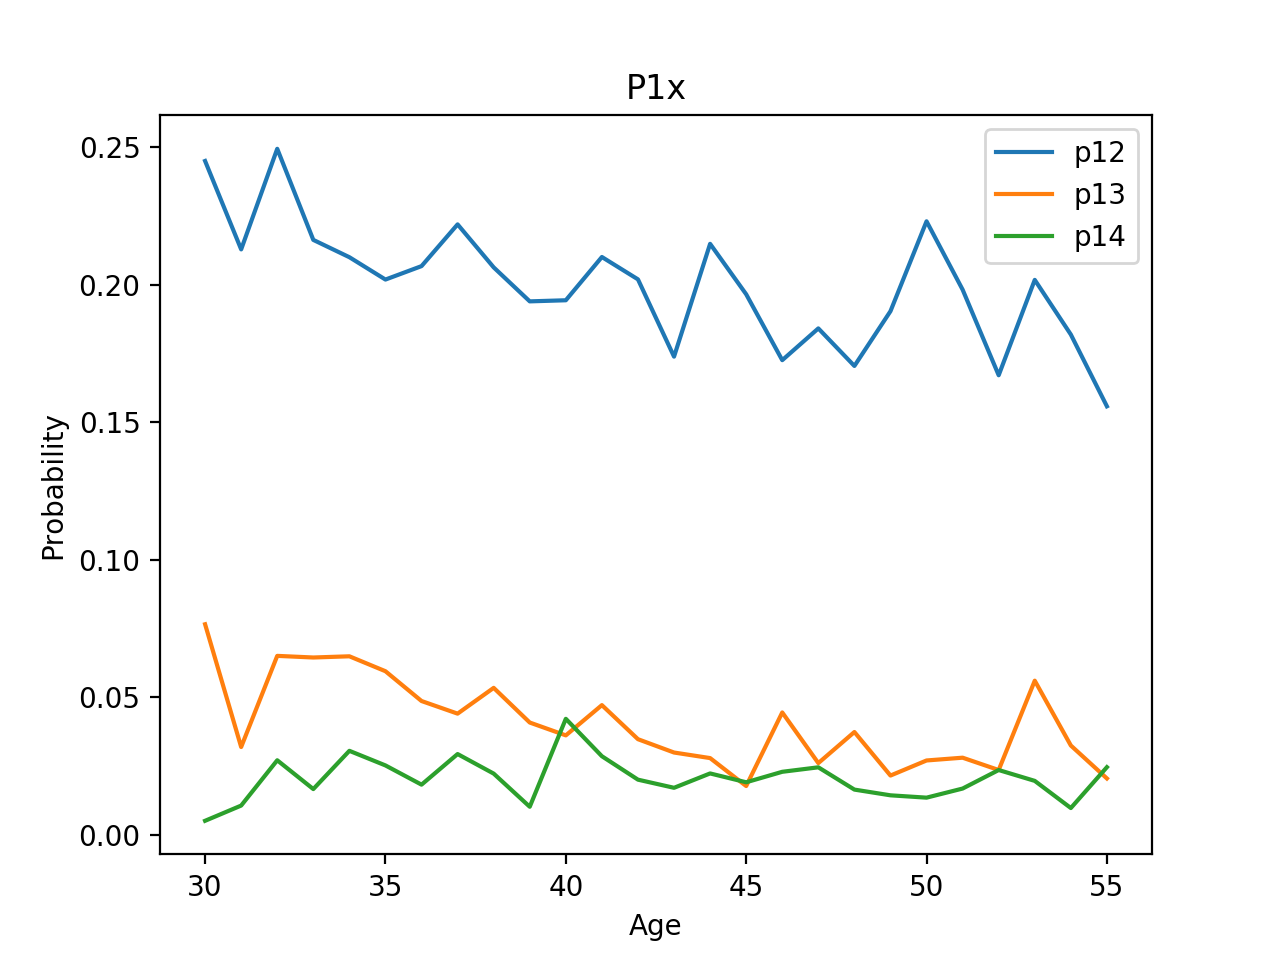

In [39]:
q11=[]
q12=[]
q13=[]
q14=[]
for i in markov1:
    q11.append(i[0][0])
    q12.append(i[0][1])
    q13.append(i[0][2])
    q14.append(i[0][3])
age=np.arange(30,30+len(q11))
markov1.shape
%matplotlib notebook
#plt.plot(age,q11,label='p11')
plt.plot(age,q12,label='p12')
plt.plot(age,q13,label='p13')
plt.plot(age,q14,label='p14')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P1x')
plt.legend()

<IPython.core.display.Javascript object>


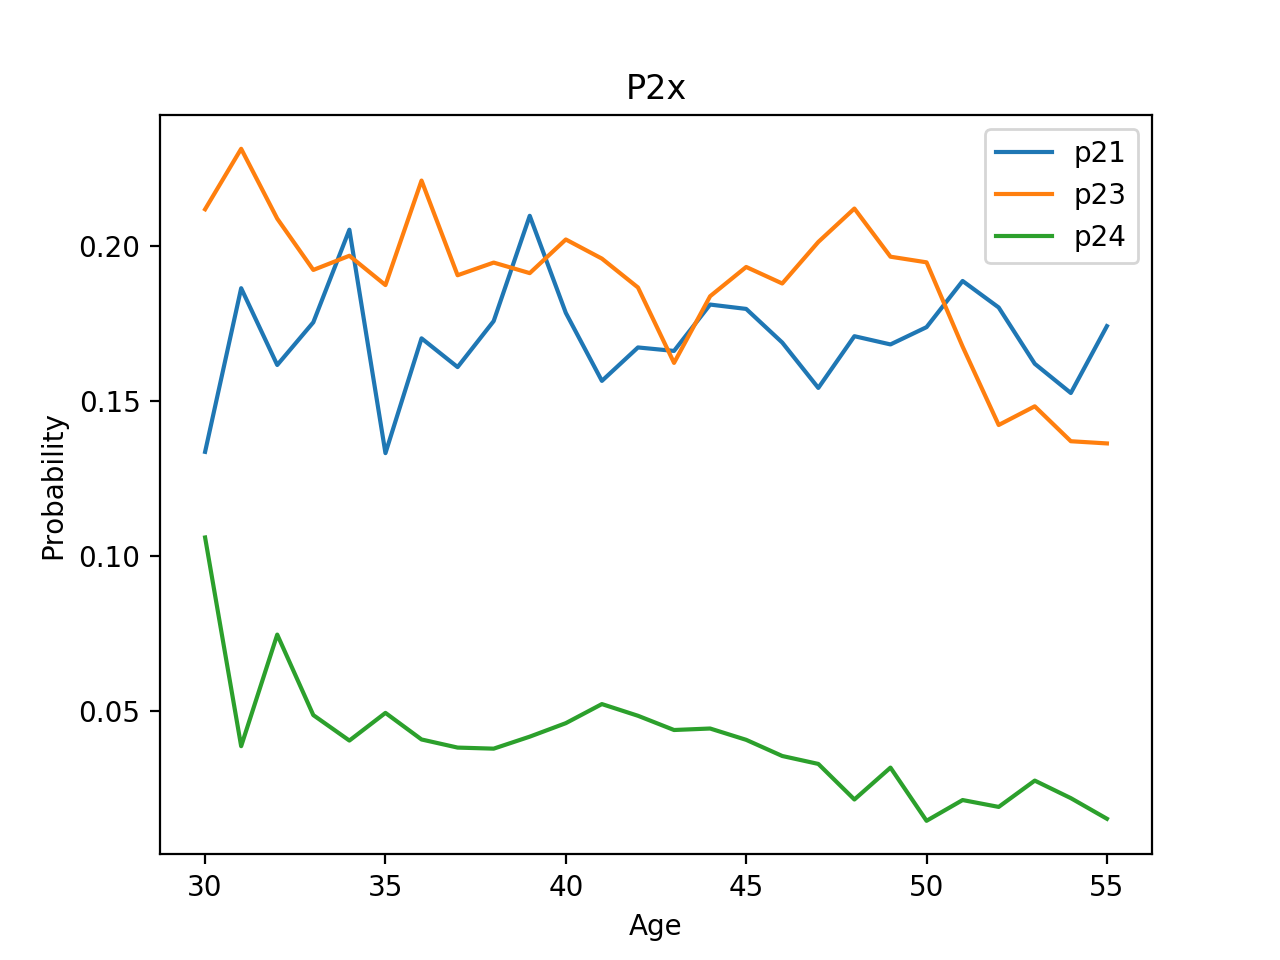

In [40]:
q21=[]
q22=[]
q23=[]
q24=[]
for i in markov1:
    q21.append(i[1][0])
    q22.append(i[1][1])
    q23.append(i[1][2])
    q24.append(i[1][3])
age=np.arange(30,30+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q21,label='p21')
#plt.plot(age,q22,label='p22')
plt.plot(age,q23,label='p23')
plt.plot(age,q24,label='p24')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P2x')
plt.legend()

In [41]:
q31=[]
q32=[]
q33=[]
q34=[]
for i in markov1:
    q31.append(i[2][0])
    q32.append(i[2][1])
    q33.append(i[2][2])
    q34.append(i[2][3])
age=np.arange(30,30+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q31,label='p31')
plt.plot(age,q32,label='p32')
#plt.plot(age,q33,label='p33')
plt.plot(age,q34,label='p34')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P3x')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


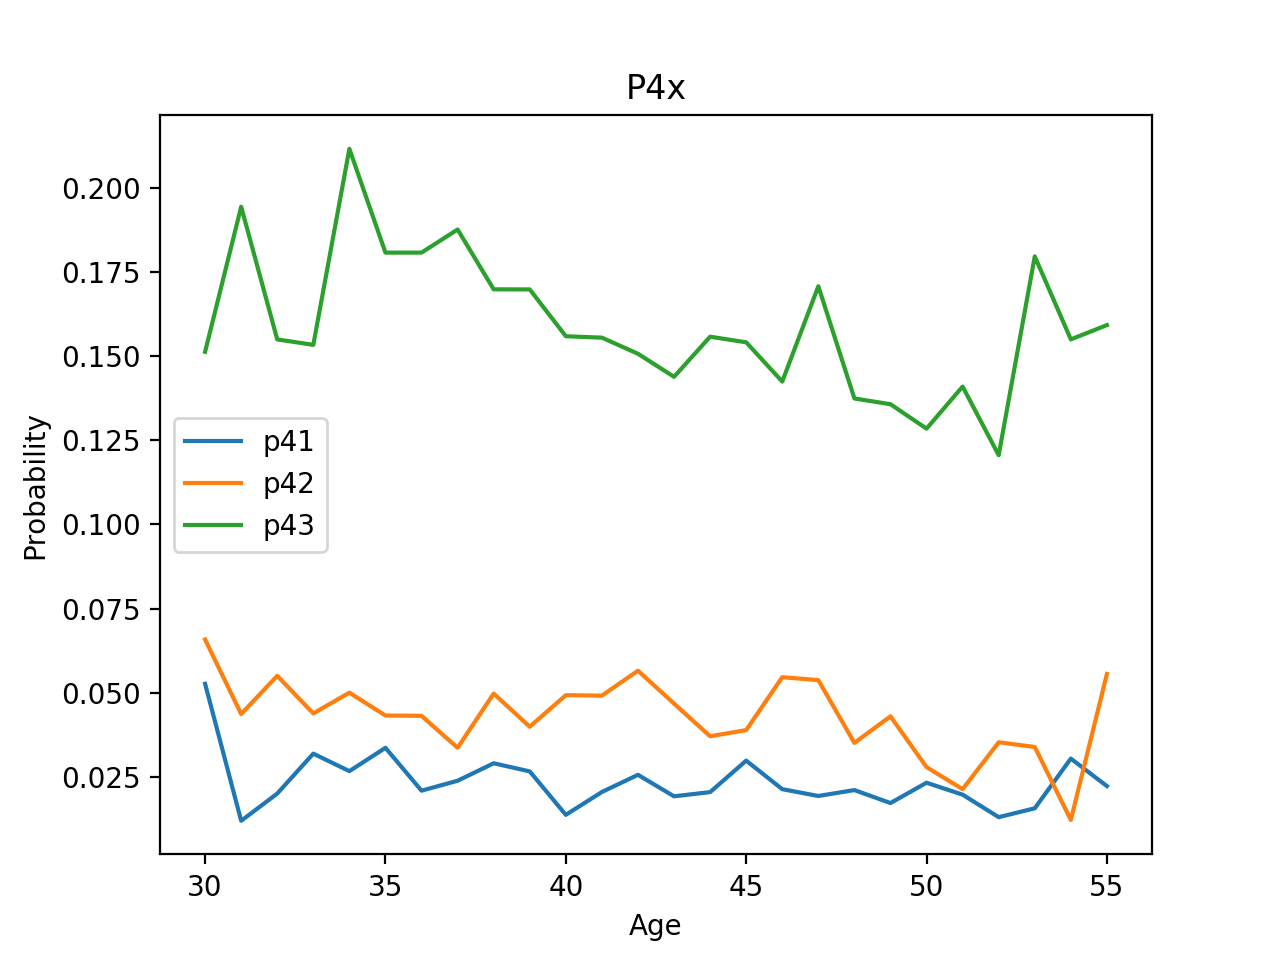

In [42]:
q41=[]
q42=[]
q43=[]
q44=[]
for i in markov1:
    q41.append(i[3][0])
    q42.append(i[3][1])
    q43.append(i[3][2])
    q44.append(i[3][3])
age=np.arange(30,30+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q41,label='p41')
plt.plot(age,q42,label='p42')
plt.plot(age,q43,label='p43')
#plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P4x')
plt.legend()

<IPython.core.display.Javascript object>


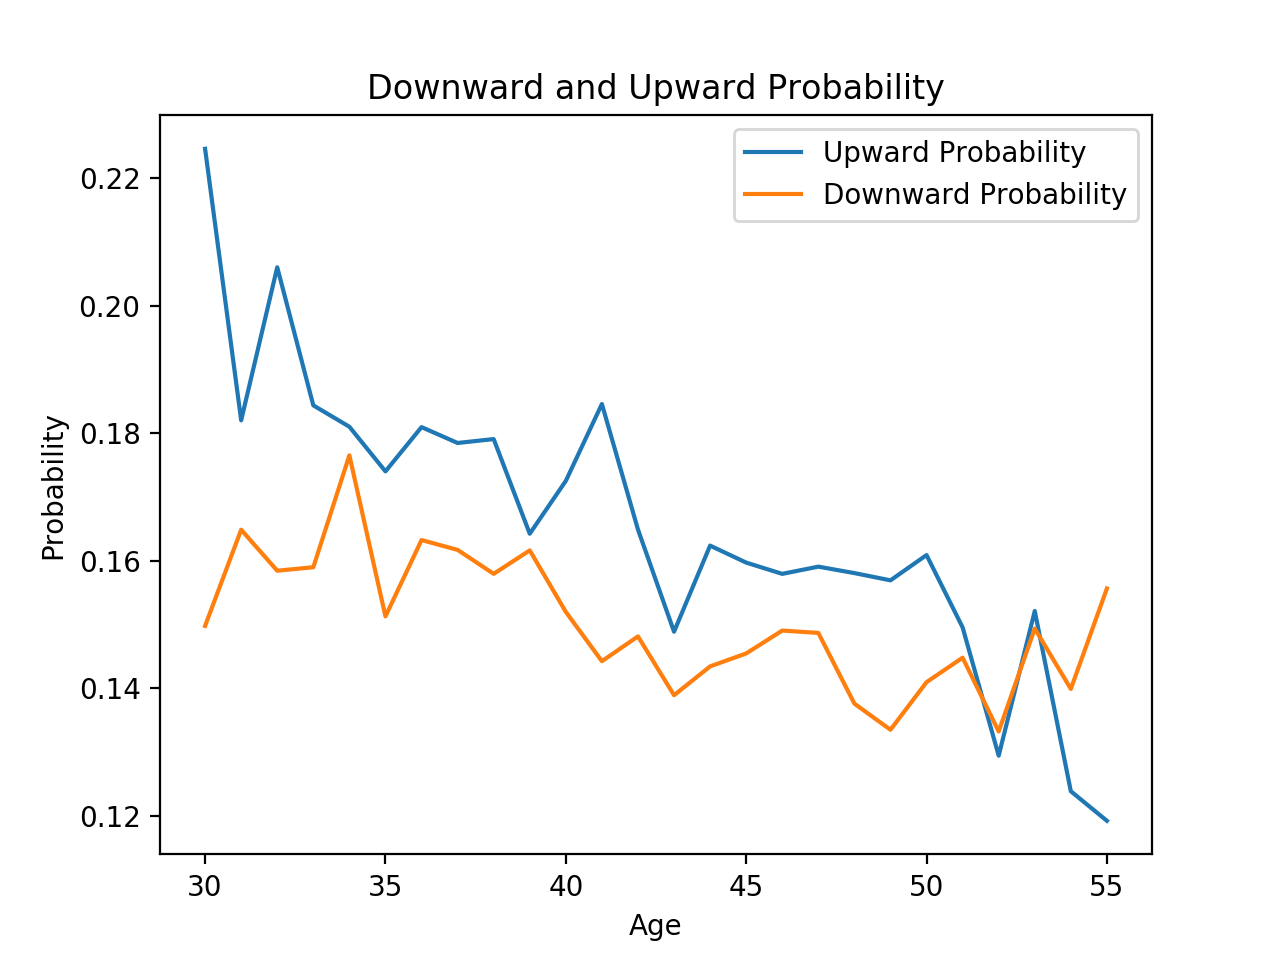

In [45]:
qupward=[]
qdownward=[]
for i in markov1:
    qdownward.append(((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4))
    qupward.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupward,label='Upward Probability')
plt.plot(age,qdownward,label='Downward Probability')
#plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward and Upward Probability')
plt.legend()

Findings:
1. The reason why pxx's decrease in age is that the probability of upward movements decrease in age.
2. The probability of downward movements remain roughly constant in age.

### Income Transition Matrices Conditional on Race

In [18]:
med_black=[[0]*16]*26
med_black=np.array(med_black)
med_spain=[[0]*16]*26
med_spain=np.array(med_spain)
med_race3=[[0]*16]*26
med_race3=np.array(med_race3)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        race=nlsydata['race'][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(race==2):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_black[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(race==3):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_race3[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(race==1):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_spain[int(age1)-30][type]+=1

In [19]:
med_black=med_black.reshape(26,4,4)
med_race3=med_race3.reshape(26,4,4)
med_spain=med_spain.reshape(26,4,4)
print('Number matrices for black:\n',med_black)
print('Number matrices for other:\n',med_race3)
print('Number matrices for spain:\n',med_spain)
markovblack=[]
for i in range(len(med_black)):
    for j in range(4):
        sum_quan=sum(med_black[i][j])
        med_black[i][j]/max(sum_quan,0.1)
        markovblack.append(med_black[i][j]/max(sum_quan,0.1))
markovblack=np.array(markovblack)
markovblack=markovblack.reshape(26,4,4)

markovrace3=[]
for i in range(len(med_race3)):
    for j in range(4):
        sum_quan=sum(med_race3[i][j])
        med_race3[i][j]/max(sum_quan,0.1)
        markovrace3.append(med_race3[i][j]/max(sum_quan,0.1))
markovrace3=np.array(markovrace3)
markovrace3=markovrace3.reshape(26,4,4)

markovspain=[]
for i in range(len(med_spain)):
    for j in range(4):
        sum_quan=sum(med_spain[i][j])
        med_spain[i][j]/max(sum_quan,0.1)
        markovspain.append(med_spain[i][j]/max(sum_quan,0.1))
markovspain=np.array(markovspain)
markovspain=markovspain.reshape(26,4,4)

Number matrices for black:
 [[[ 59  15   4   0]
  [  9  30   9   4]
  [  0  11  16  10]
  [  0   0   2  12]]

 [[101  20   2   1]
  [ 18  47  17   6]
  [  8  11  27  11]
  [  0   0   9  24]]

 [[111  28   9   2]
  [ 27  73  21   6]
  [  6  21  41  16]
  [  1   4  11  47]]

 [[161  32  10   2]
  [ 32  78  22   1]
  [  5  20  51  17]
  [  4   3  17  62]]

 [[181  41  13   4]
  [ 45 105  25   7]
  [  7  19  67  19]
  [  2   4  21  58]]

 [[196  44  14   4]
  [ 29 111  29   7]
  [  8  28  63  20]
  [  4   8  20  61]]

 [[235  54   4   2]
  [ 43 116  34   9]
  [ 11  37  85  23]
  [  4   7  20  64]]

 [[199  60   9   4]
  [ 47 124  32   7]
  [ 13  41  69  24]
  [  1   5  23  79]]

 [[244  46   8   2]
  [ 46 122  32   7]
  [  9  39  77  20]
  [  4   8  21  65]]

 [[212  43   8   0]
  [ 60 119  31   9]
  [  8  27  83  13]
  [  4   6  25  77]]

 [[246  58   9   5]
  [ 44 124  44   5]
  [  8  25  83  27]
  [  2   7  23  69]]

 [[254  61  11   4]
  [ 45 133  37   4]
  [  7  30  96  27]
  [  0  11

In [47]:
qdownblack=[]
qdownrace3=[]
qdownspain=[]
for i in markovblack:
    qdownblack.append(((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4))
for i in markovrace3:
    qdownrace3.append(((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4))
for i in markovspain:
    qdownspain.append(((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4))
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownblack,label='black')
plt.plot(age,qdownrace3,label='other')
plt.plot(age,qdownspain,label='hispanic')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


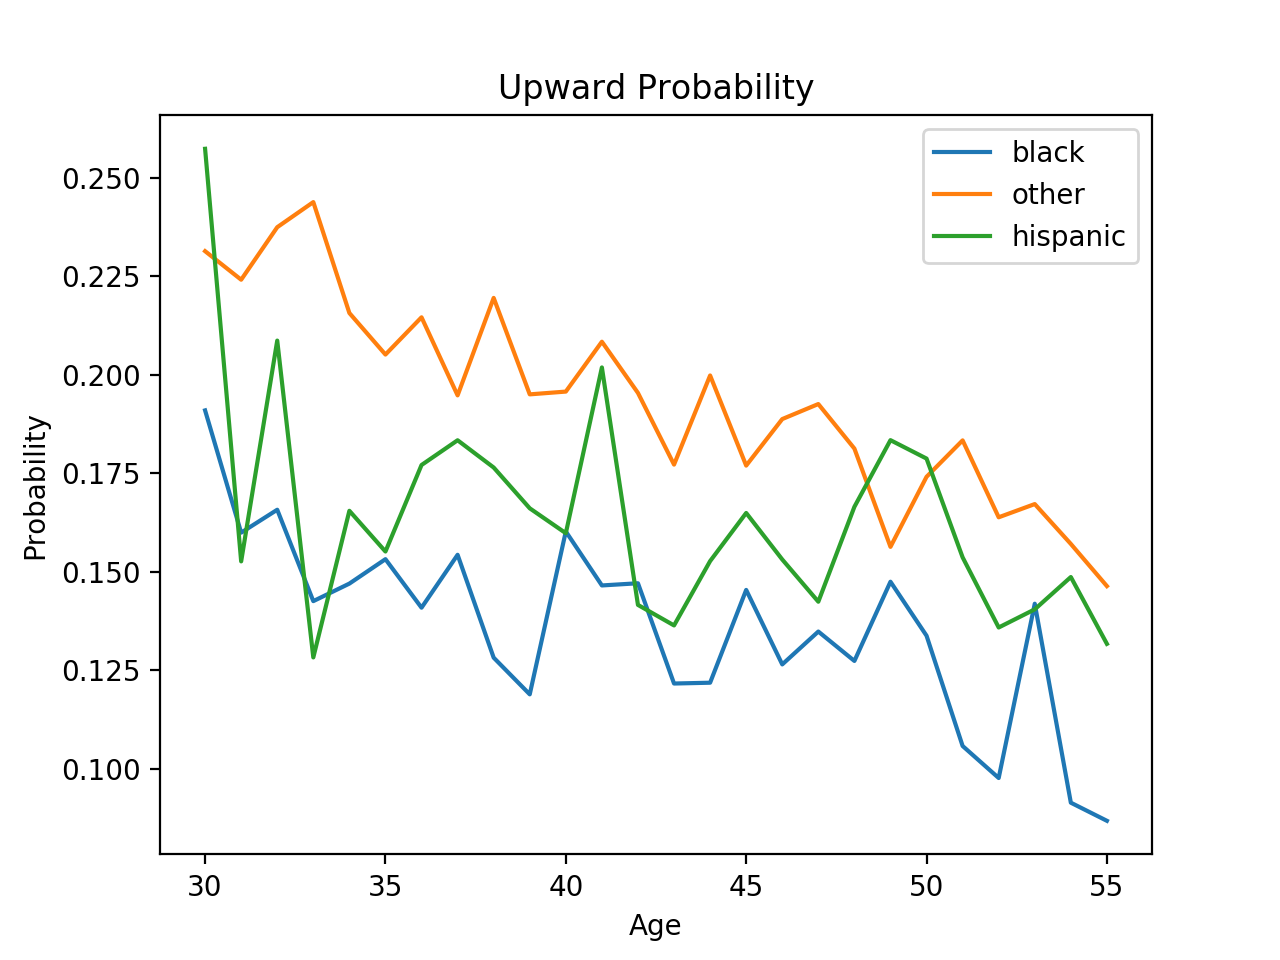

In [48]:
qupblack=[]
quprace3=[]
qupspain=[]
for i in markovblack:
    qupblack.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovrace3:
    quprace3.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovspain:
    qupspain.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupblack,label='black')
plt.plot(age,quprace3,label='other')
plt.plot(age,qupspain,label='hispanic')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

In [46]:
q21black=[]
q21race3=[]
q21spain=[]
for i in markovblack:
    q21black.append(i[1][0])
for i in markovrace3:
    q21race3.append(i[1][0])
for i in markovspain:
    q21spain.append(i[1][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q21black,label='black')
plt.plot(age,q21race3,label='other')
plt.plot(age,q21spain,label='hispanic')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


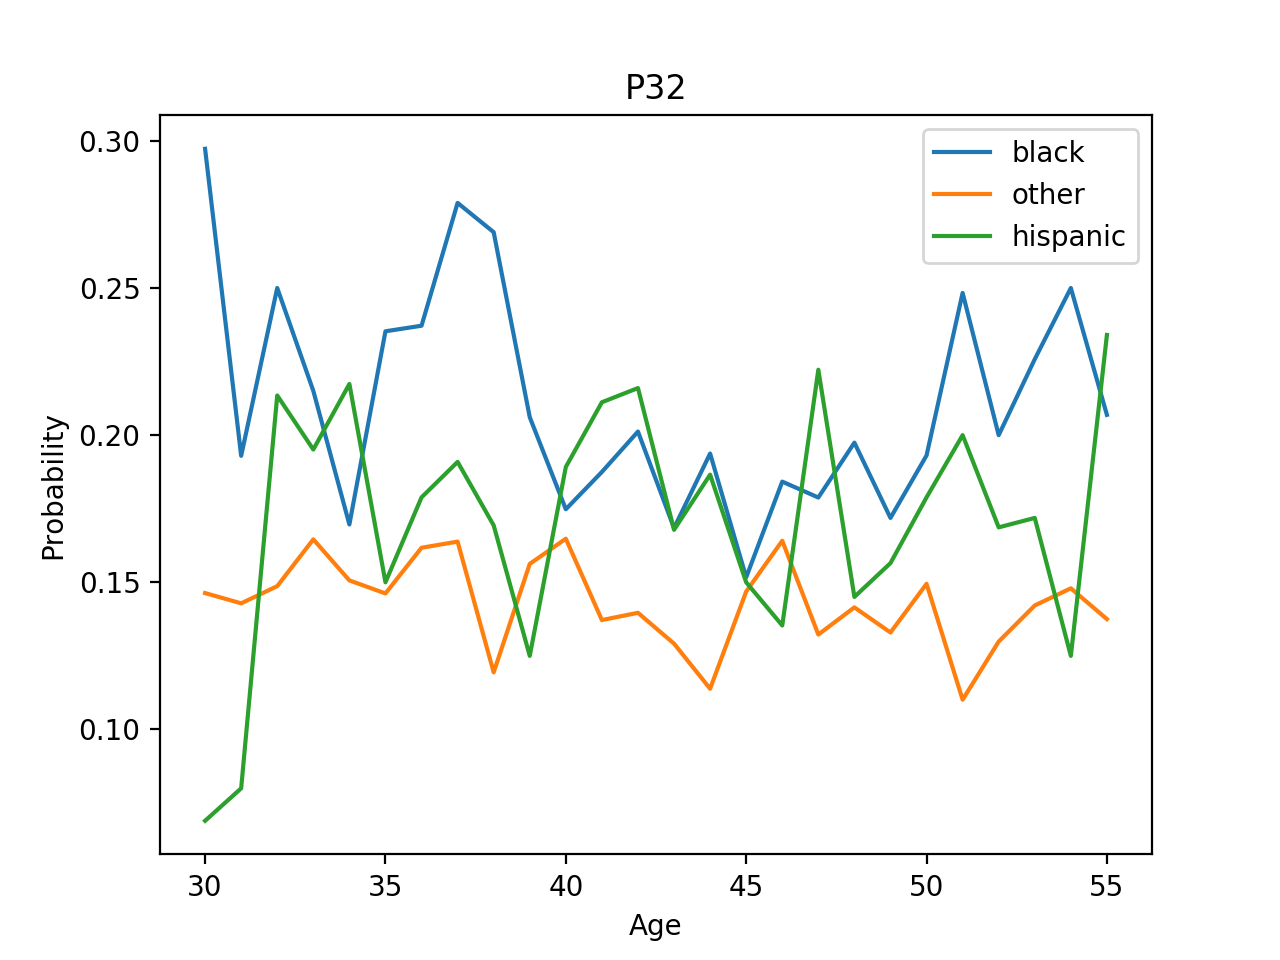

In [49]:
q32black=[]
q32race3=[]
q32spain=[]
for i in markovblack:
    q32black.append(i[2][1])
for i in markovrace3:
    q32race3.append(i[2][1])
for i in markovspain:
    q32spain.append(i[2][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q32black,label='black')
plt.plot(age,q32race3,label='other')
plt.plot(age,q32spain,label='hispanic')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

<IPython.core.display.Javascript object>


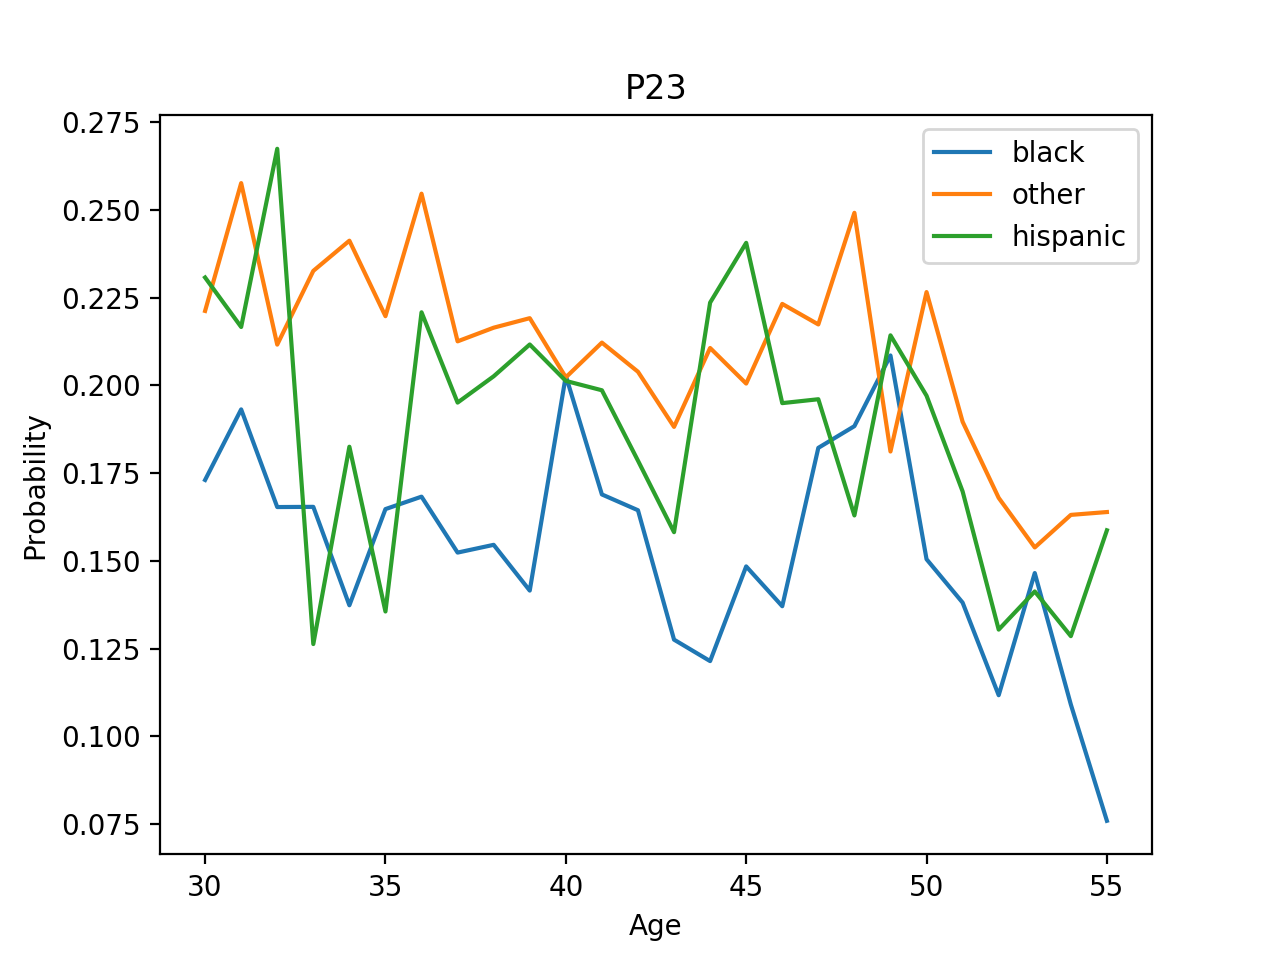

In [50]:
import matplotlib.pyplot as plt
q23black=[]
q23race3=[]
q23spain=[]
for i in markovblack:
    q23black.append(i[1][2])
for i in markovrace3:
    q23race3.append(i[1][2])
for i in markovspain:
    q23spain.append(i[1][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q23black,label='black')
plt.plot(age,q23race3,label='other')
plt.plot(age,q23spain,label='hispanic')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

In [23]:
import matplotlib.pyplot as plt
q12black=[]
q12race3=[]
q12spain=[]
for i in markovblack:
    q12black.append(i[0][1])
for i in markovrace3:
    q12race3.append(i[0][1])
for i in markovspain:
    q12spain.append(i[0][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q12black,label='black')
plt.plot(age,q12race3,label='other')
plt.plot(age,q12spain,label='hispanic')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P12')
plt.legend()

<IPython.core.display.Javascript object>

Finding:
1. The probabilities of black people's downward movements are much higher than that of non-black and non-hispanic people. 
2. The hispanic people's downward probabilities are between the black and the non-black and non-hispanic people.
3. For upward probabilities, the trends are just the reverse. That is, black people have the lowest upward probabilities, while non-black and non-hispanic people have the highest upward probabilities.

### Income Transition Matrices Conditional on Whether Attending College

In [24]:
med_nocol=[[0]*16]*26
med_nocol=np.array(med_nocol)
med_col=[[0]*16]*26
med_col=np.array(med_col)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        edu=nlsydata['edu'][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(edu<12) &(edu>=0):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_nocol[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(edu>=3) &(edu<=20):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_col[int(age1)-30][type]+=1

In [25]:
med_nocol=med_nocol.reshape(26,4,4)
med_col=med_col.reshape(26,4,4)
print('Number matrices:\n',med_nocol)
print('Number matrices:\n',med_col)
markovnocol=[]
for i in range(len(med_nocol)):
    for j in range(4):
        sum_quan=sum(med_nocol[i][j])
        med_nocol[i][j]/max(sum_quan,0.1)
        markovnocol.append(med_nocol[i][j]/max(sum_quan,0.1))
markovnocol=np.array(markovnocol)
markovnocol=markovnocol.reshape(26,4,4)

markovcol=[]
for i in range(len(med_col)):
    for j in range(4):
        sum_quan=sum(med_col[i][j])
        med_col[i][j]/max(sum_quan,0.1)
        markovcol.append(med_col[i][j]/max(sum_quan,0.1))
markovcol=np.array(markovcol)
markovcol=markovcol.reshape(26,4,4)

Number matrices:
 [[[ 29   6   0   1]
  [  6   9   4   0]
  [  0   1   5   1]
  [  2   1   0   3]]

 [[ 43   6   1   0]
  [ 12  16   4   0]
  [  1   2  10   3]
  [  1   0   3   1]]

 [[ 51  13   2   0]
  [ 14  20  10   4]
  [  2   6  10   1]
  [  0   1   2   3]]

 [[ 85  17   0   1]
  [ 10  29   7   1]
  [  3  10  14   1]
  [  2   1   2   0]]

 [[100  12   5   1]
  [ 18  30   9   1]
  [  2  12  15   8]
  [  0   1   1   7]]

 [[ 95  11   4   1]
  [ 18  39   6   2]
  [  2   6  15   5]
  [  1   0   5   4]]

 [[129  16   2   2]
  [ 21  34  17   3]
  [  6   7  24   4]
  [  3   1   2   6]]

 [[109  24   3   0]
  [ 18  44   8   0]
  [  2  11  23   2]
  [  1   0   7   5]]

 [[145  20   3   2]
  [ 14  34   7   1]
  [  6  10  15   4]
  [  0   2   4   8]]

 [[118  17   0   0]
  [ 23  28  13   1]
  [  0   6  19   4]
  [  0   0   8   2]]

 [[132  16   7   3]
  [ 23  45   6   2]
  [  4   9  20   2]
  [  1   3   2   5]]

 [[137  24   3   2]
  [ 17  37  11   3]
  [  2  13  27   5]
  [  3   1   1   3]]

<IPython.core.display.Javascript object>


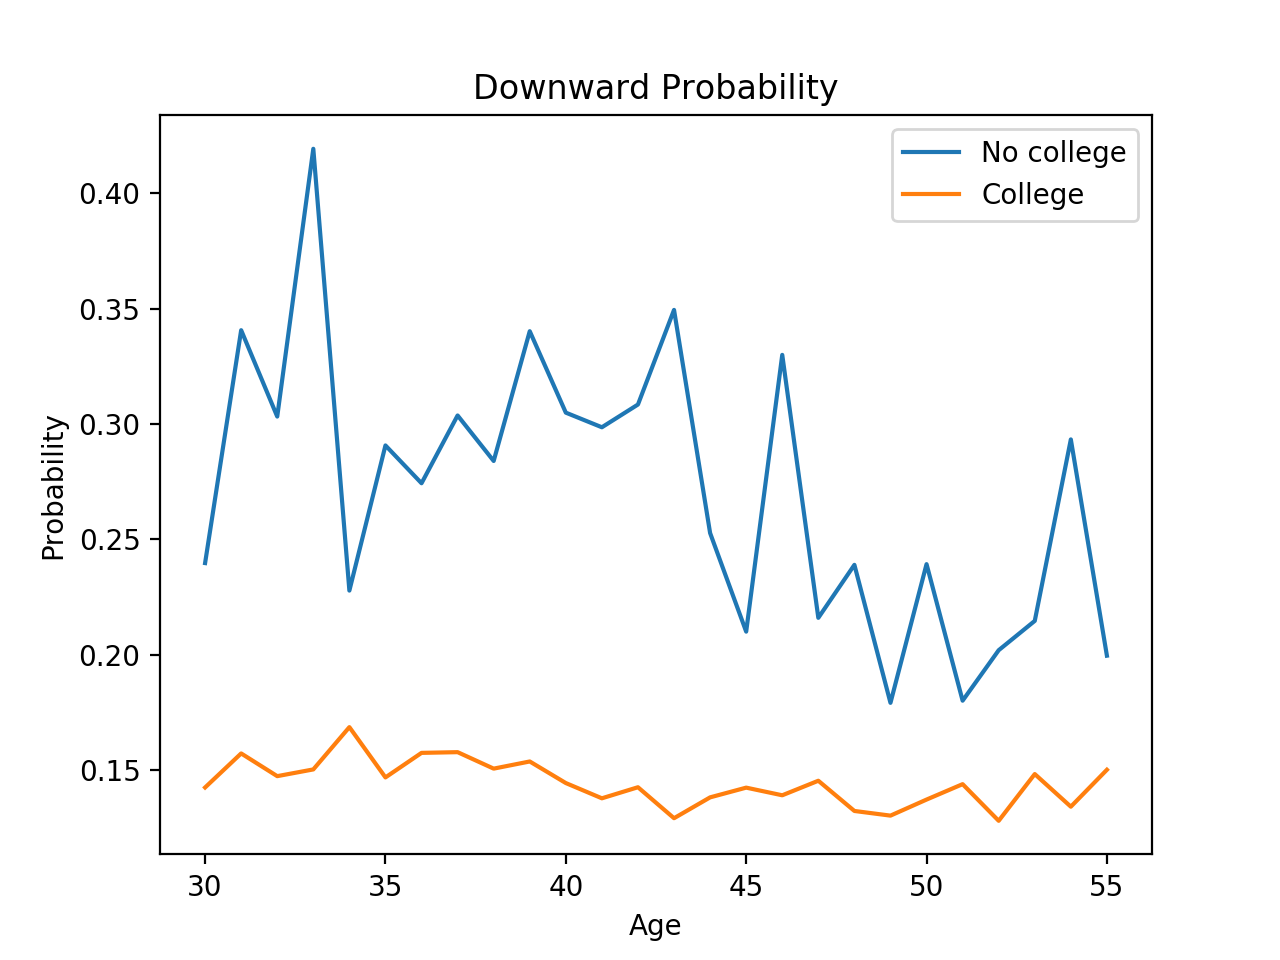

In [26]:
qdownnocol=[]
qdowncol=[]
for i in markovnocol:
    qdownnocol.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
for i in markovcol:
    qdowncol.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownnocol,label='No college')
plt.plot(age,qdowncol,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>


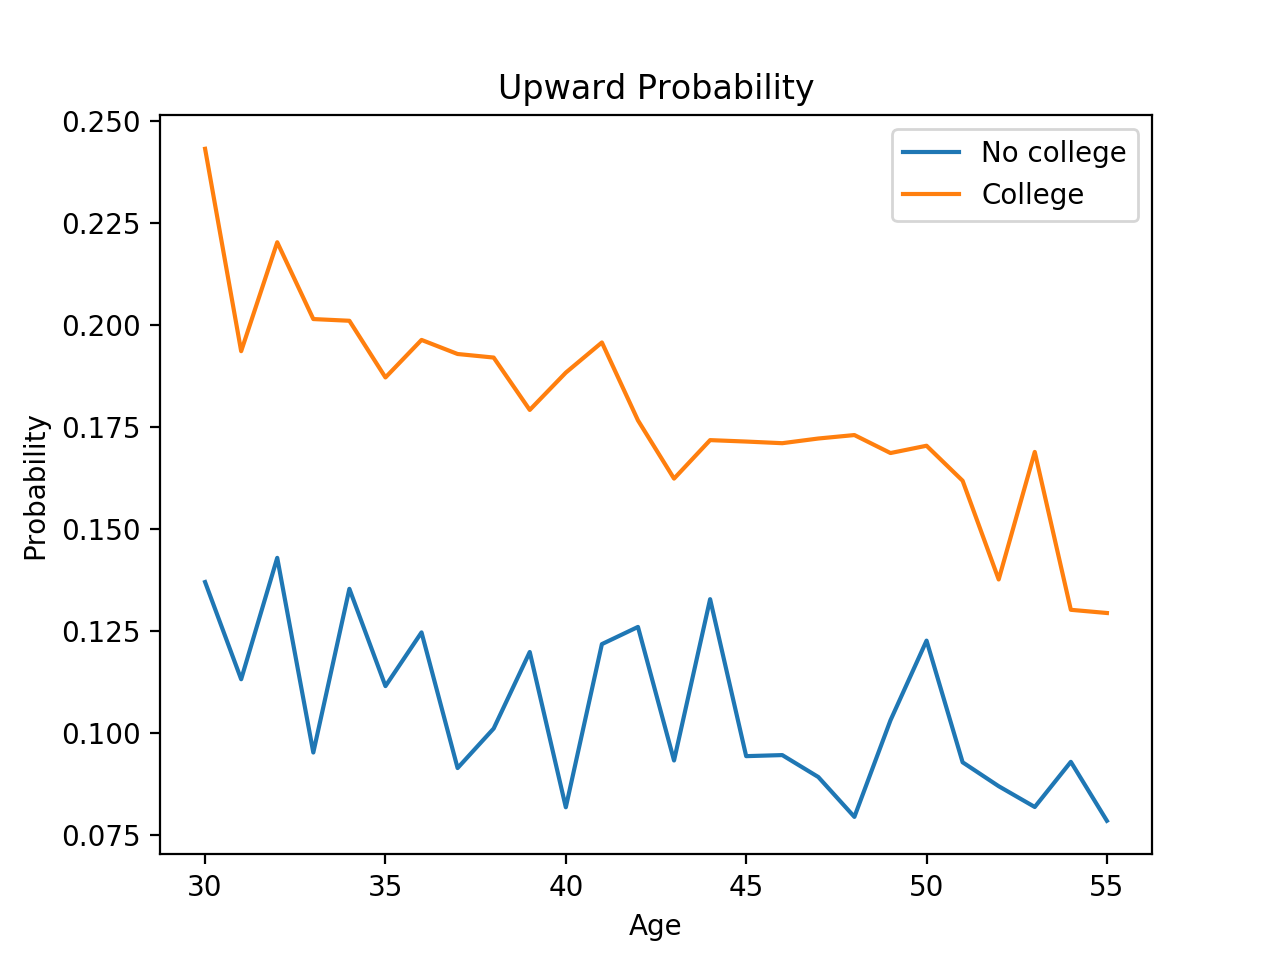

In [53]:
qupnocol=[]
qupcol=[]
for i in markovnocol:
    qupnocol.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovcol:
    qupcol.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))

age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupnocol,label='No college')
plt.plot(age,qupcol,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

In [54]:
q21nocol=[]
q21col=[]
for i in markovnocol:
    q21nocol.append(i[1][0])
for i in markovcol:
    q21col.append(i[1][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q21nocol,label='No college')
plt.plot(age,q21col,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


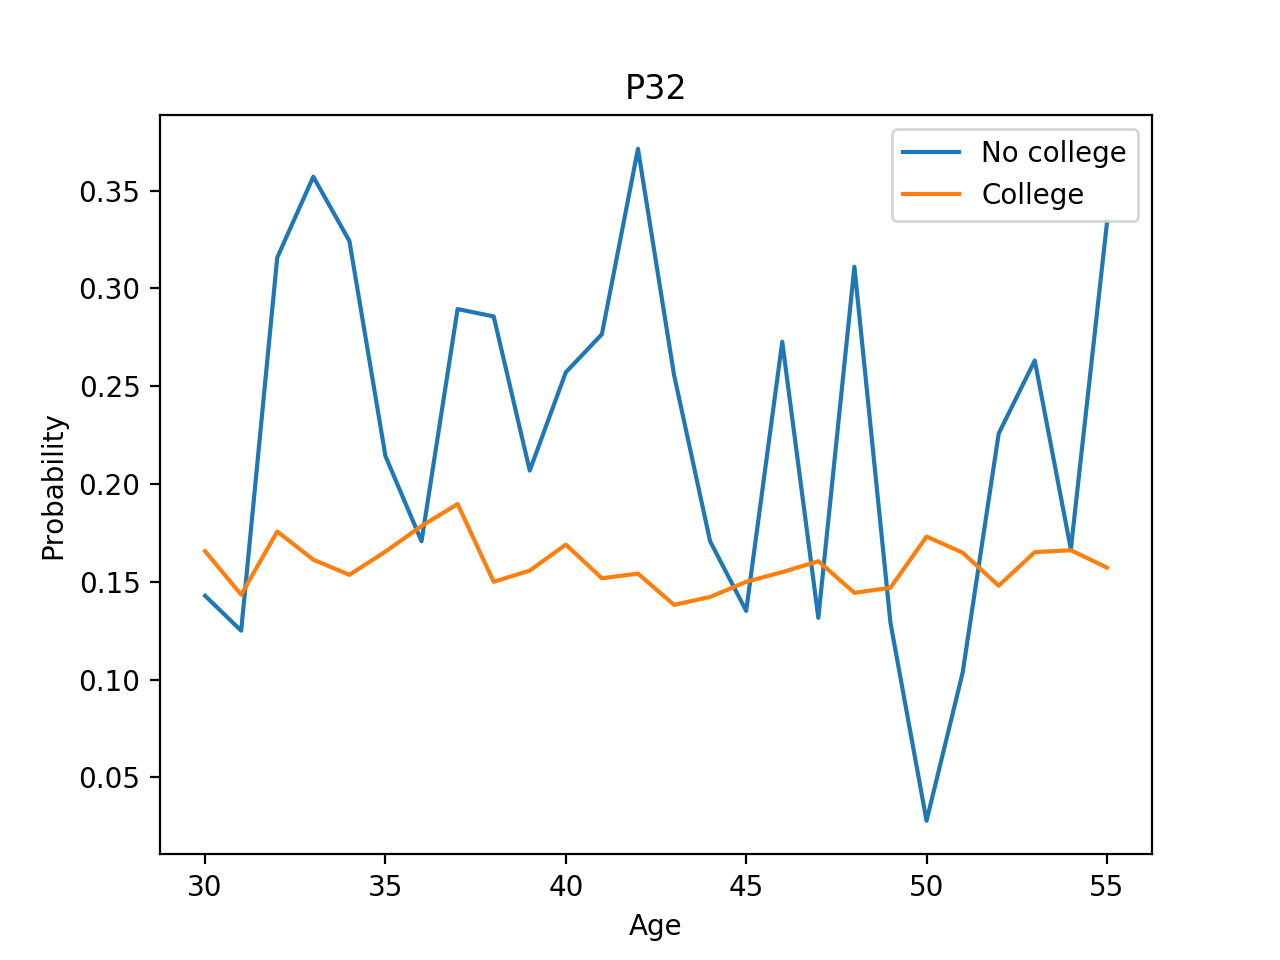

In [55]:
import matplotlib.pyplot as plt
q32nocol=[]
q32col=[]
for i in markovnocol:
    q32nocol.append(i[2][1])
for i in markovcol:
    q32col.append(i[2][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q32nocol,label='No college')
plt.plot(age,q32col,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

In [56]:
q23nocol=[]
q23col=[]
for i in markovnocol:
    q23nocol.append(i[1][2])
for i in markovcol:
    q23col.append(i[1][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q23nocol,label='No college')
plt.plot(age,q23col,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


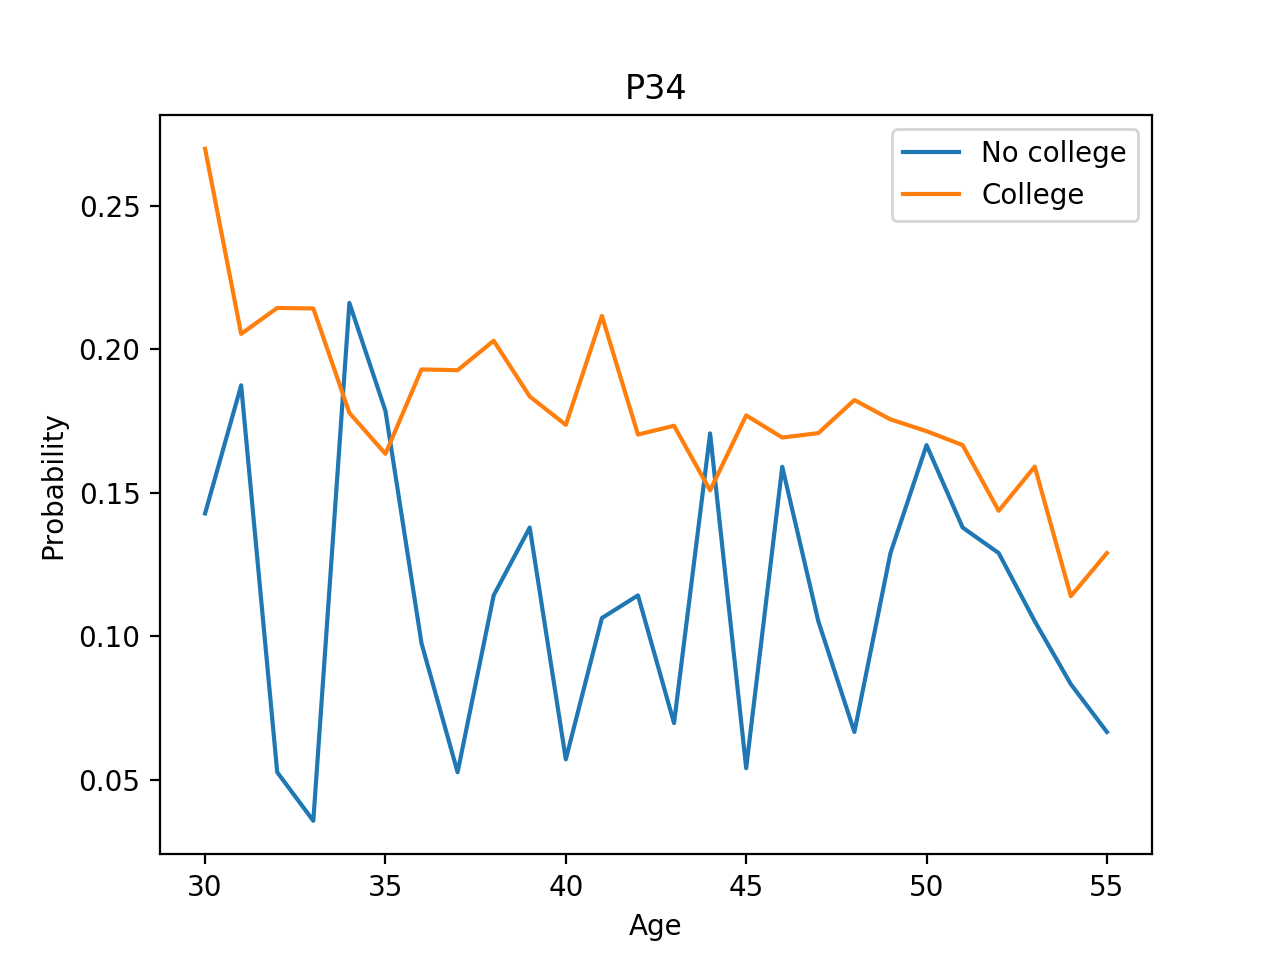

In [57]:
q34nocol=[]
q34col=[]
for i in markovnocol:
    q34nocol.append(i[2][3])
for i in markovcol:
    q34col.append(i[2][3])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q34nocol,label='No college')
plt.plot(age,q34col,label='College')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P34')
plt.legend()

Finding:
The probabilities of downward movements are much higher for people who did not attend college compared to those who had some college education. The trends for upward movements are exactly the opposite.

In [58]:
med_m=[[0]*16]*26
med_m=np.array(med_m)
med_f=[[0]*16]*26
med_f=np.array(med_f)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        sex=nlsydata['gender'][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(sex==1):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_m[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(sex==2):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_f[int(age1)-30][type]+=1

In [59]:
med_m=med_m.reshape(26,4,4)
med_f=med_f.reshape(26,4,4)
print('Number matrices:\n',med_m)
print('Number matrices:\n',med_f)
markovm=[]
for i in range(len(med_m)):
    for j in range(4):
        sum_quan=sum(med_m[i][j])
        med_m[i][j]/max(sum_quan,0.1)
        markovm.append(med_m[i][j]/max(sum_quan,0.1))
markovm=np.array(markovm)
markovm=markovm.reshape(26,4,4)

markovf=[]
for i in range(len(med_f)):
    for j in range(4):
        sum_quan=sum(med_f[i][j])
        med_f[i][j]/max(sum_quan,0.1)
        markovf.append(med_f[i][j]/max(sum_quan,0.1))
markovf=np.array(markovf)
markovf=markovf.reshape(26,4,4)

Number matrices:
 [[[ 52  27   7   1]
  [ 15  70  22  14]
  [  3  19  55  32]
  [  2   5  12  51]]

 [[ 87  21   4   2]
  [ 31 102  44   8]
  [ 12  24  74  30]
  [  0   6  25 100]]

 [[ 98  50  12   5]
  [ 36 121  49  14]
  [ 14  45 131  50]
  [  3  10  34 161]]

 [[128  61  10   2]
  [ 37 149  48  10]
  [  7  40 142  53]
  [  9   9  43 194]]

 [[150  49  20   5]
  [ 55 183  60  13]
  [ 12  50 196  53]
  [  3   9  71 228]]

 [[136  60  19   8]
  [ 33 201  62  13]
  [  9  44 180  64]
  [  7  14  59 237]]

 [[201  58  13   3]
  [ 57 194  82   7]
  [ 19  70 240  83]
  [ 10  15  66 281]]

 [[166  61  10   8]
  [ 56 214  69  13]
  [ 13  62 235  78]
  [  9  12  72 281]]

 [[194  68  15   7]
  [ 59 195  71  13]
  [  9  66 225  84]
  [ 14  15  63 277]]

 [[176  48  11   2]
  [ 63 164  56  11]
  [ 14  55 225  66]
  [ 11  10  75 264]]

 [[191  58  13  14]
  [ 66 196  66  15]
  [ 16  64 224  56]
  [  6  14  64 291]]

 [[206  70  14   8]
  [ 50 196  72  14]
  [ 10  72 234  84]
  [  7  20  63 299]]

<IPython.core.display.Javascript object>


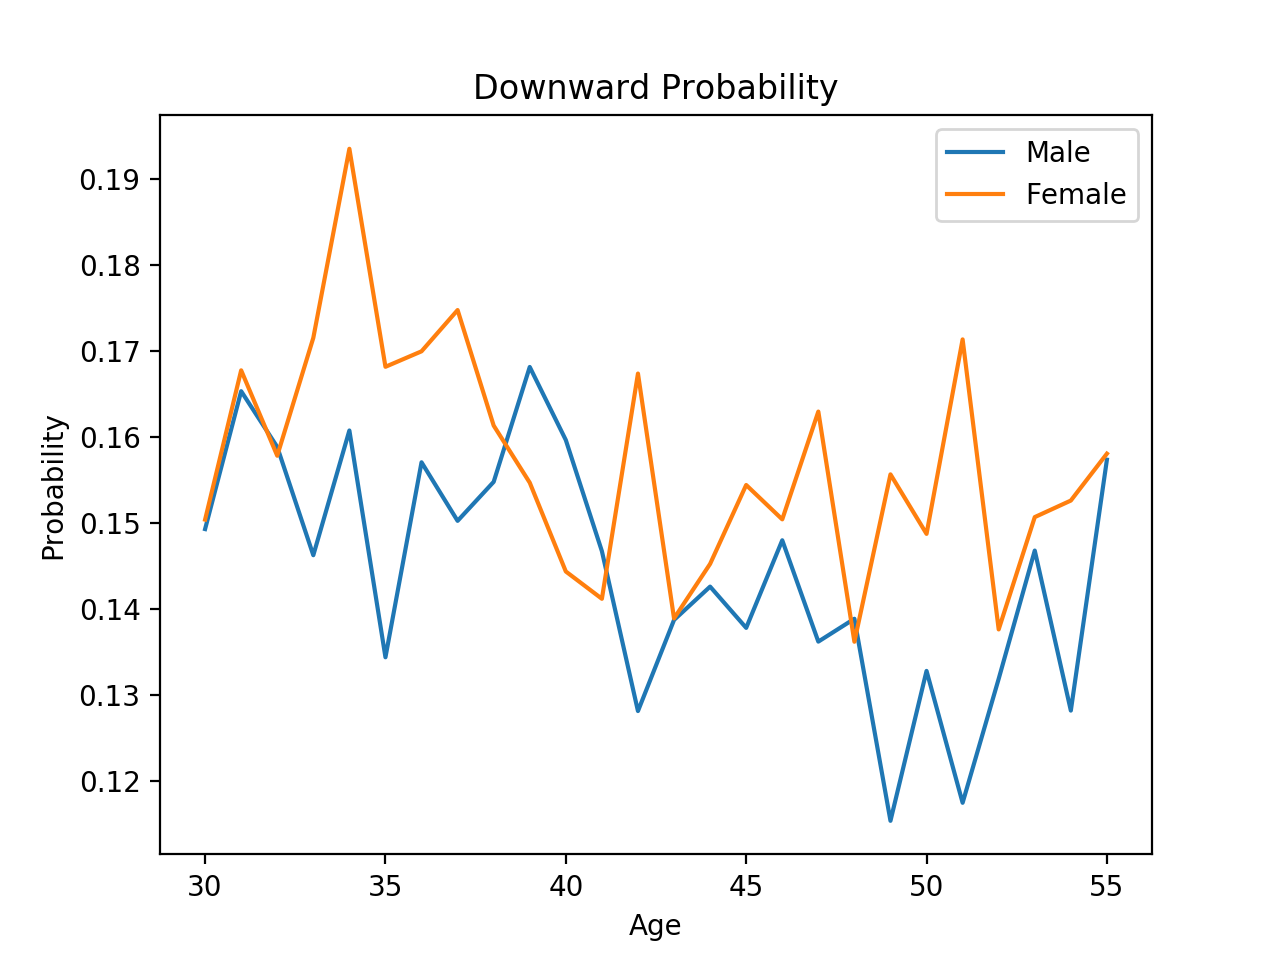

In [62]:
qdownm=[]
qdownf=[]
for i in markovm:
    qdownm.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
for i in markovf:
    qdownf.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownm,label='Male')
plt.plot(age,qdownf,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>


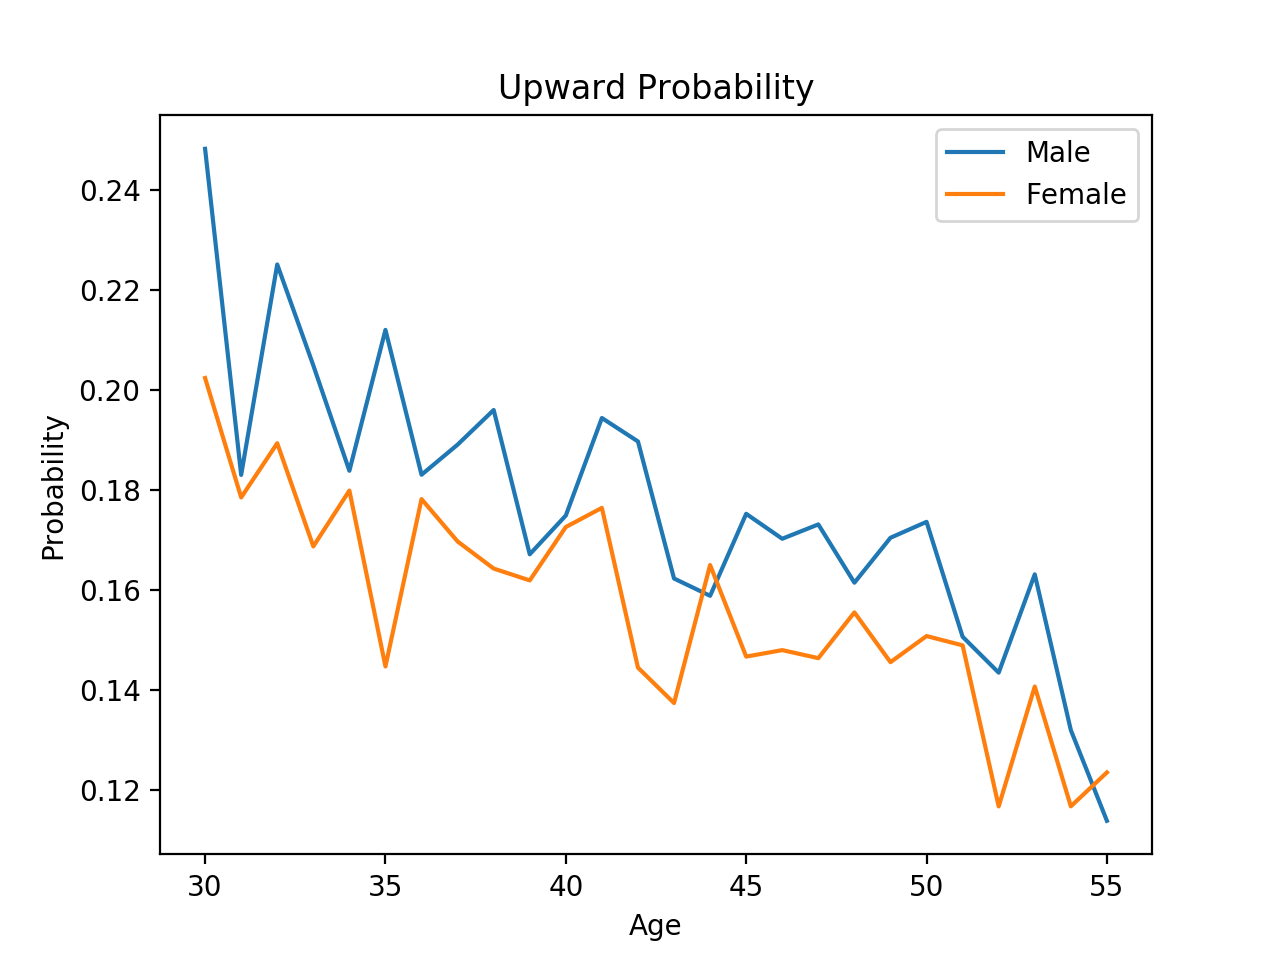

In [64]:
qupm=[]
qupf=[]
for i in markovm:
    qupm.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovf:
    qupf.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))

age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupm,label='Male')
plt.plot(age,qupf,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

<IPython.core.display.Javascript object>


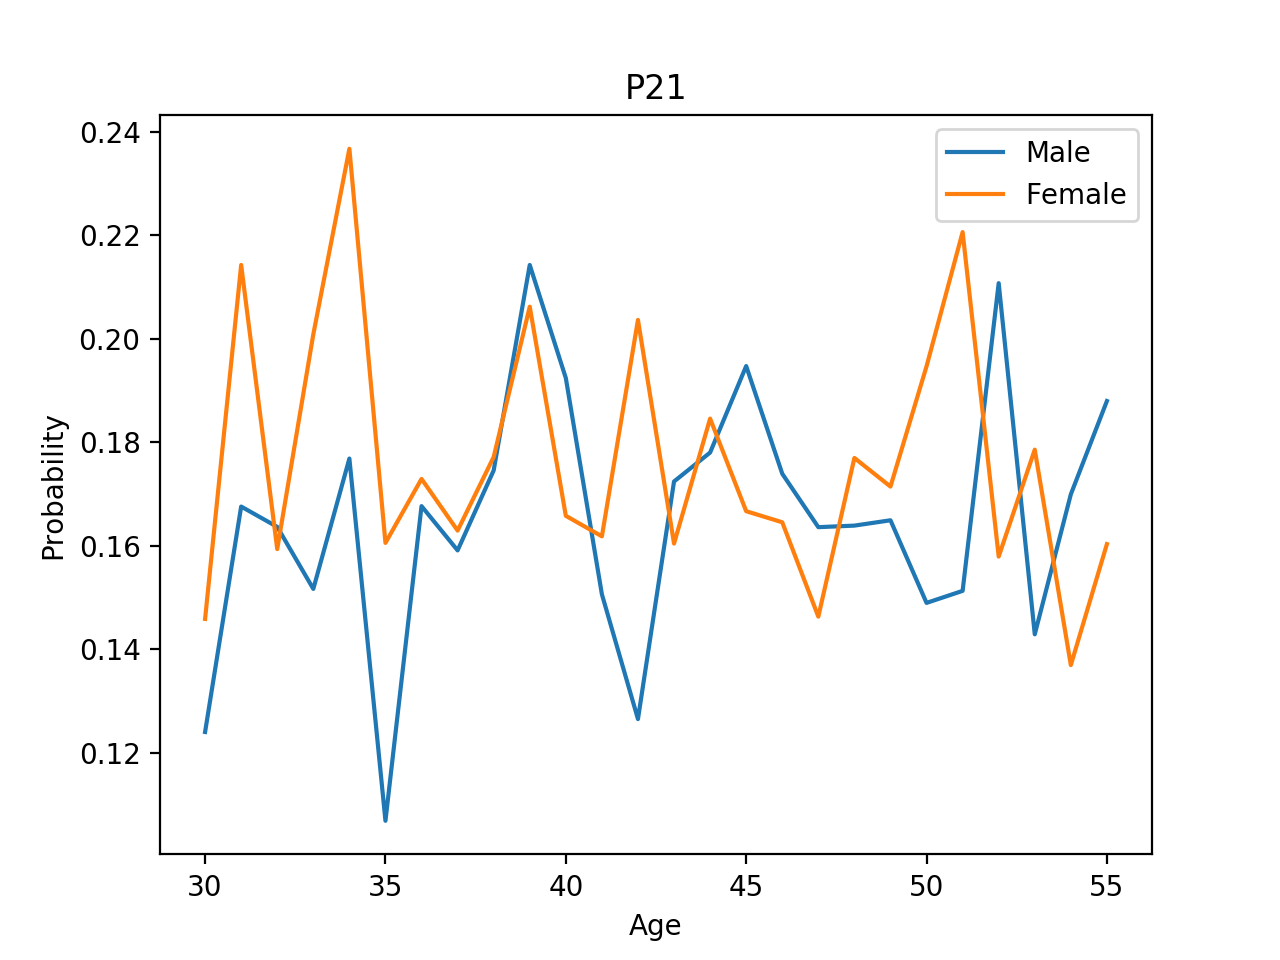

In [65]:
q21m=[]
q21f=[]
for i in markovm:
    q21m.append(i[1][0])
for i in markovf:
    q21f.append(i[1][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q21m,label='Male')
plt.plot(age,q21f,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>


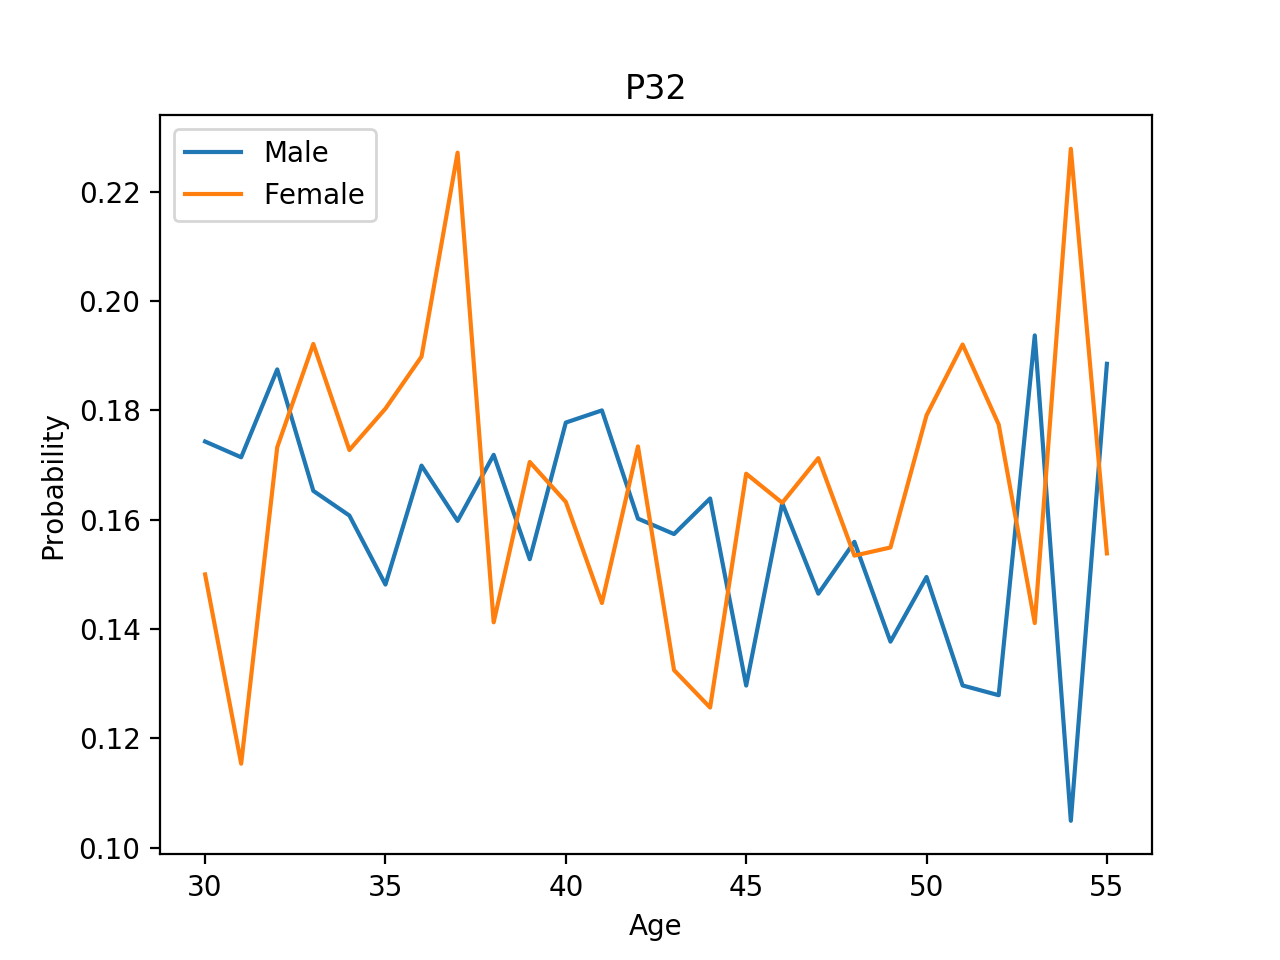

In [66]:
q32m=[]
q32f=[]
for i in markovm:
    q32m.append(i[2][1])
for i in markovf:
    q32f.append(i[2][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q32m,label='Male')
plt.plot(age,q32f,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

<IPython.core.display.Javascript object>


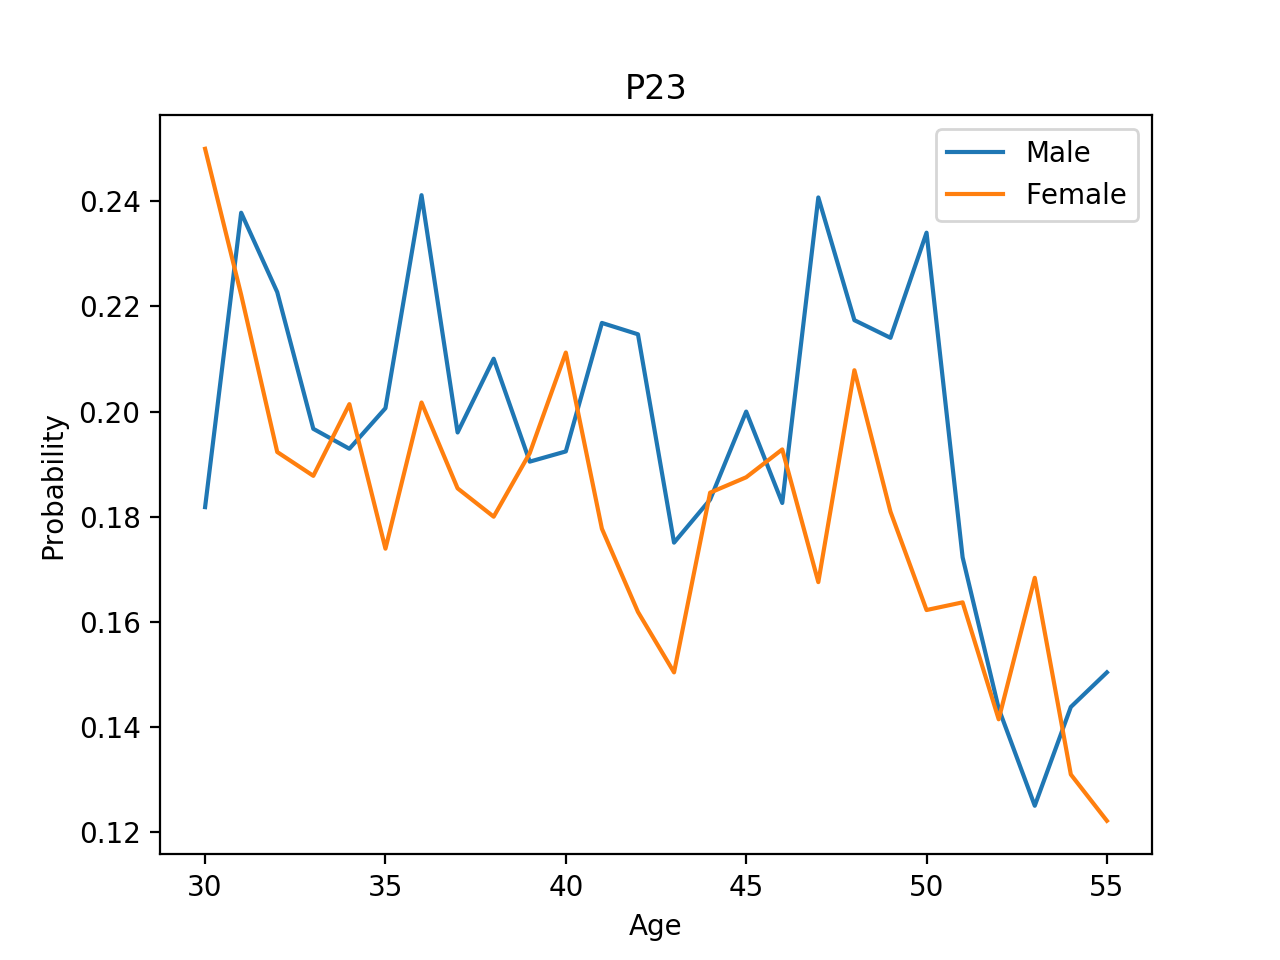

In [67]:
q23m=[]
q23f=[]
for i in markovm:
    q23m.append(i[1][2])
for i in markovf:
    q23f.append(i[1][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q23m,label='Male')
plt.plot(age,q23f,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

<IPython.core.display.Javascript object>


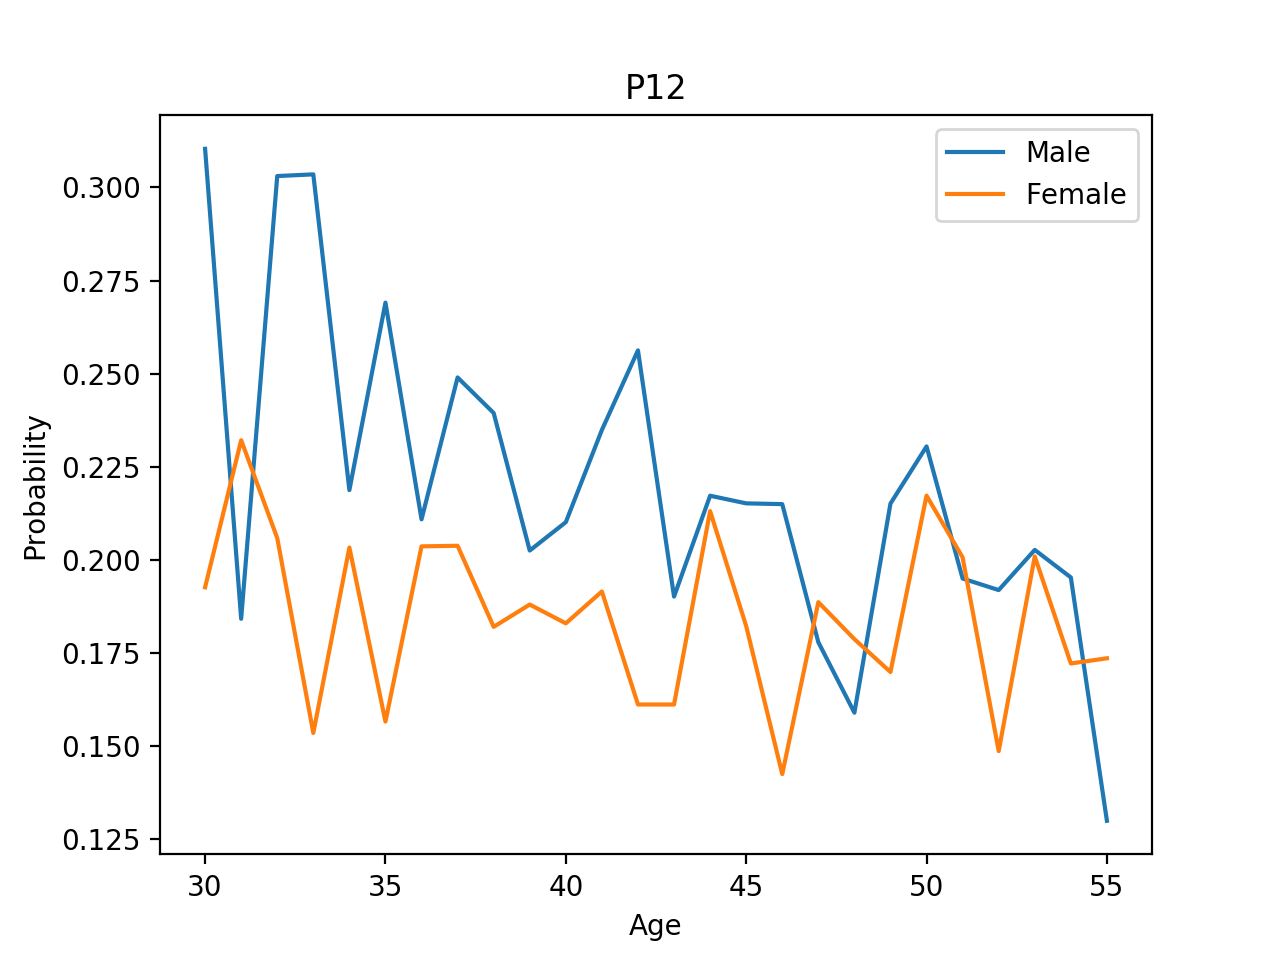

In [68]:
q12m=[]
q12f=[]
for i in markovm:
    q12m.append(i[0][1])
for i in markovf:
    q12f.append(i[0][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q12m,label='Male')
plt.plot(age,q12f,label='Female')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P12')
plt.legend()

Finding:
The differences in upward movements and downward movements between men and women are not obvious. Female's upward probabilities are just slightly lower than men's, and men and women have roughly the same downward probabilities.

### Income Transition Matrices Conditional on Whether living in Urban or Rural Area

In [69]:
med_u=[[0]*16]*26
med_u=np.array(med_u)
med_r=[[0]*16]*26
med_r=np.array(med_r)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        urban=nlsydata[urbanindex[j]][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(urban==1):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_u[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(urban==0):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_r[int(age1)-30][type]+=1

In [70]:
med_u=med_u.reshape(26,4,4)
med_r=med_r.reshape(26,4,4)
print('Number matrices:\n',med_u)
print('Number matrices:\n',med_r)
markovu=[]
for i in range(len(med_u)):
    for j in range(4):
        sum_quan=sum(med_u[i][j])
        med_u[i][j]/max(sum_quan,0.1)
        markovu.append(med_u[i][j]/max(sum_quan,0.1))
markovu=np.array(markovu)
markovu=markovu.reshape(26,4,4)

markovr=[]
for i in range(len(med_r)):
    for j in range(4):
        sum_quan=sum(med_r[i][j])
        med_r[i][j]/max(sum_quan,0.1)
        markovr.append(med_r[i][j]/max(sum_quan,0.1))
markovr=np.array(markovr)
markovr=markovr.reshape(26,4,4)

Number matrices:
 [[[ 94  37  13   1]
  [ 24  98  32  19]
  [  6  25  81  37]
  [  6   9  20  96]]

 [[161  41   6   3]
  [ 45 125  53  10]
  [ 21  30 128  47]
  [  2   8  39 155]]

 [[191  71  20   9]
  [ 52 166  69  22]
  [ 20  60 181  71]
  [  7  18  50 267]]

 [[275  80  21   7]
  [ 58 207  70  17]
  [ 22  59 213  72]
  [ 14  18  55 312]]

 [[279  80  27  10]
  [ 93 249  82  18]
  [ 22  75 254  89]
  [ 14  18  89 341]]

 [[310  81  24  10]
  [ 57 280  76  24]
  [ 25  69 263  72]
  [ 17  18  79 364]]

 [[350 107  22  10]
  [ 72 284 106  23]
  [ 35  93 312 113]
  [ 10  20  99 412]]

 [[313 103  21  11]
  [ 82 323  83  18]
  [ 28  99 274  96]
  [ 12  19  88 402]]

 [[350  95  22  12]
  [ 89 279  97  18]
  [ 24  79 279 110]
  [ 15  29  84 403]]

 [[324  88  20   6]
  [ 93 277  90  20]
  [ 21  73 270  77]
  [ 11  22  82 368]]

 [[355  89  20  25]
  [ 81 299 102  27]
  [ 24  76 302  84]
  [  9  23  84 404]]

 [[359 101  26  10]
  [ 79 301  96  26]
  [ 20  92 311 105]
  [  8  28  82 396]]

<IPython.core.display.Javascript object>


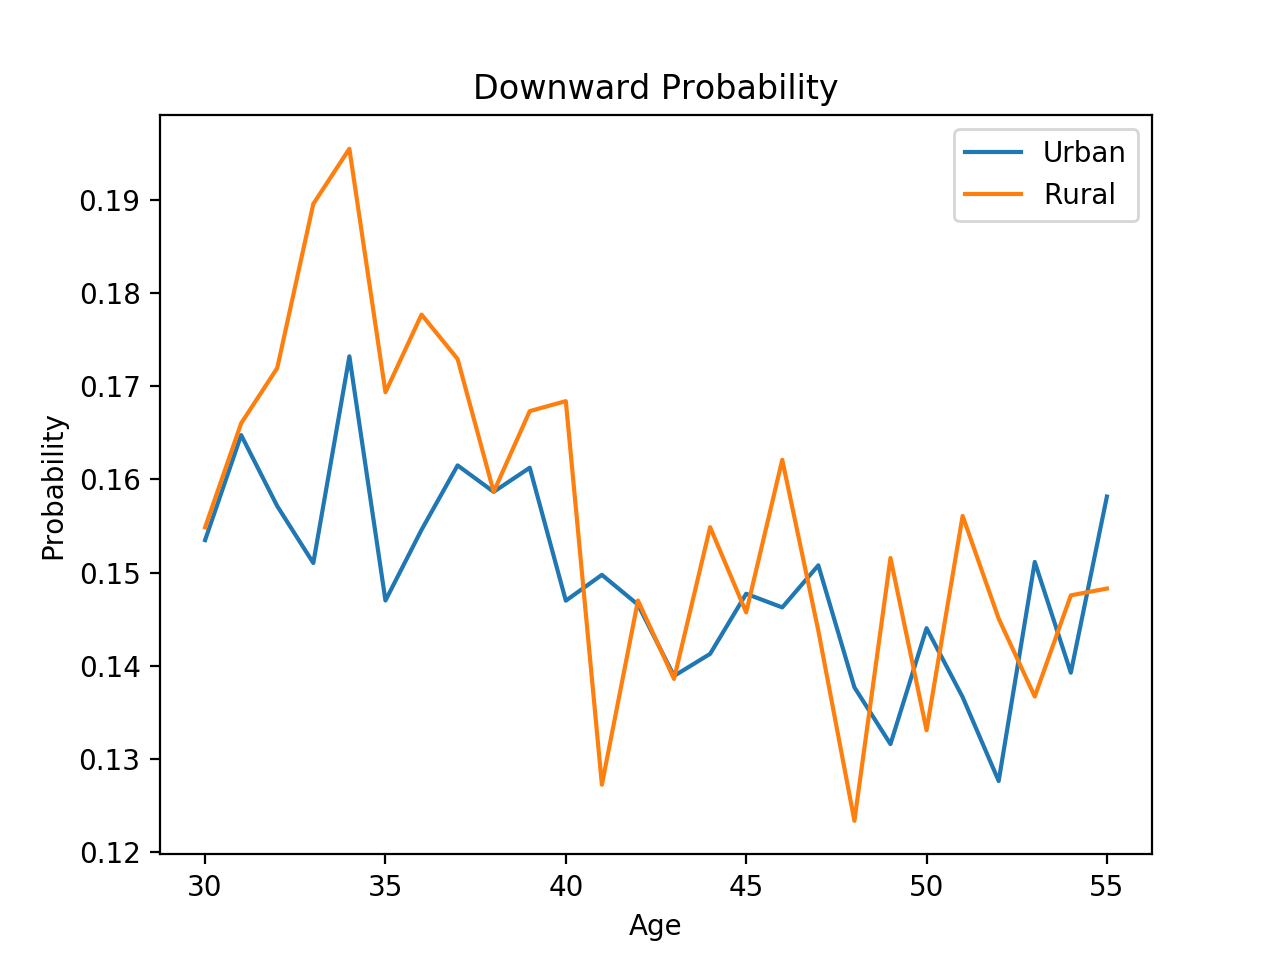

In [71]:
qdownu=[]
qdownr=[]
for i in markovu:
    qdownu.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
for i in markovr:
    qdownr.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownu,label='Urban')
plt.plot(age,qdownr,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>


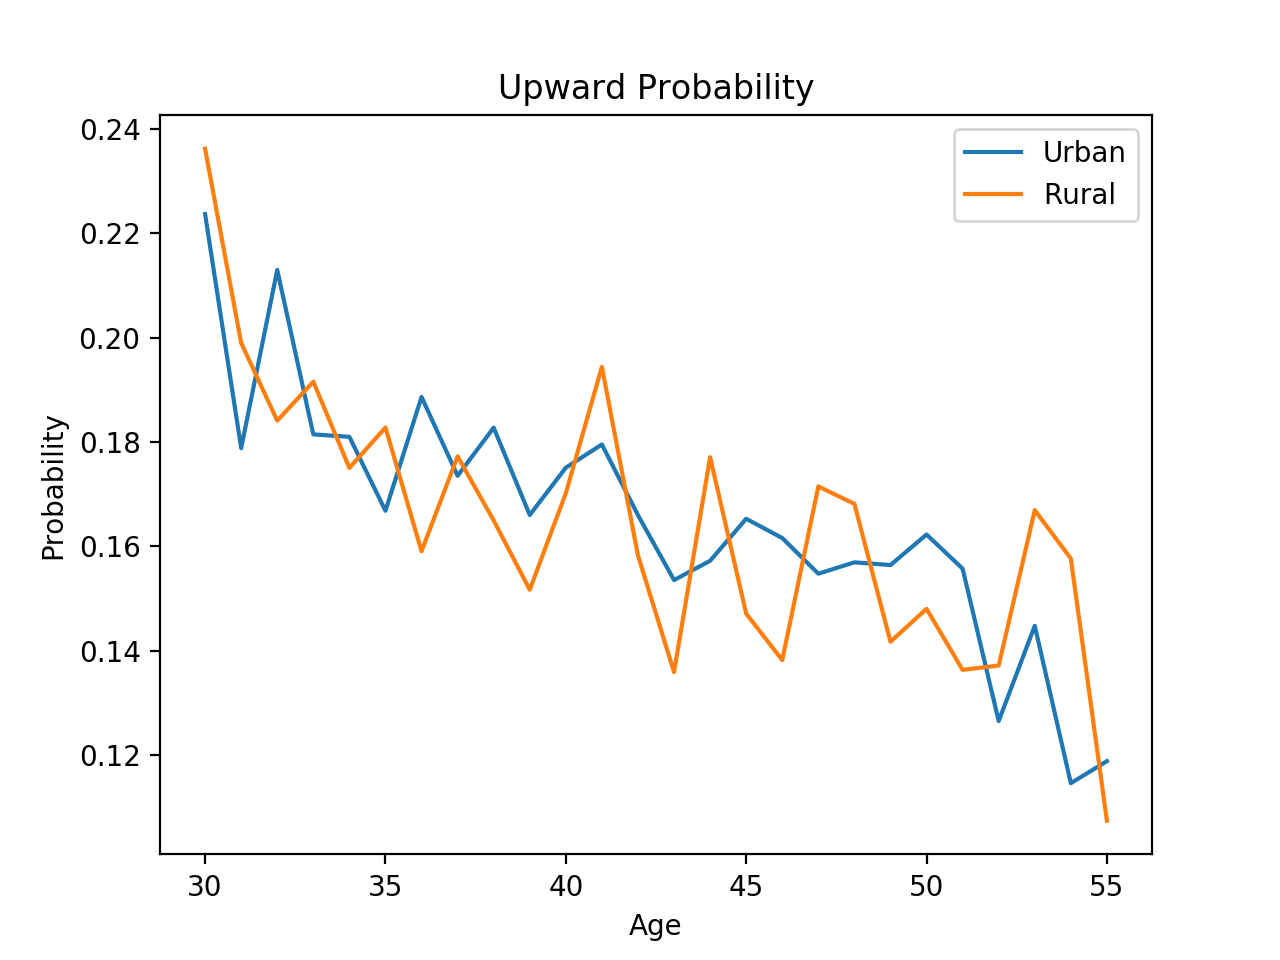

In [72]:
qupu=[]
qupr=[]
for i in markovu:
    qupu.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovr:
    qupr.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))

age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupu,label='Urban')
plt.plot(age,qupr,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

<IPython.core.display.Javascript object>


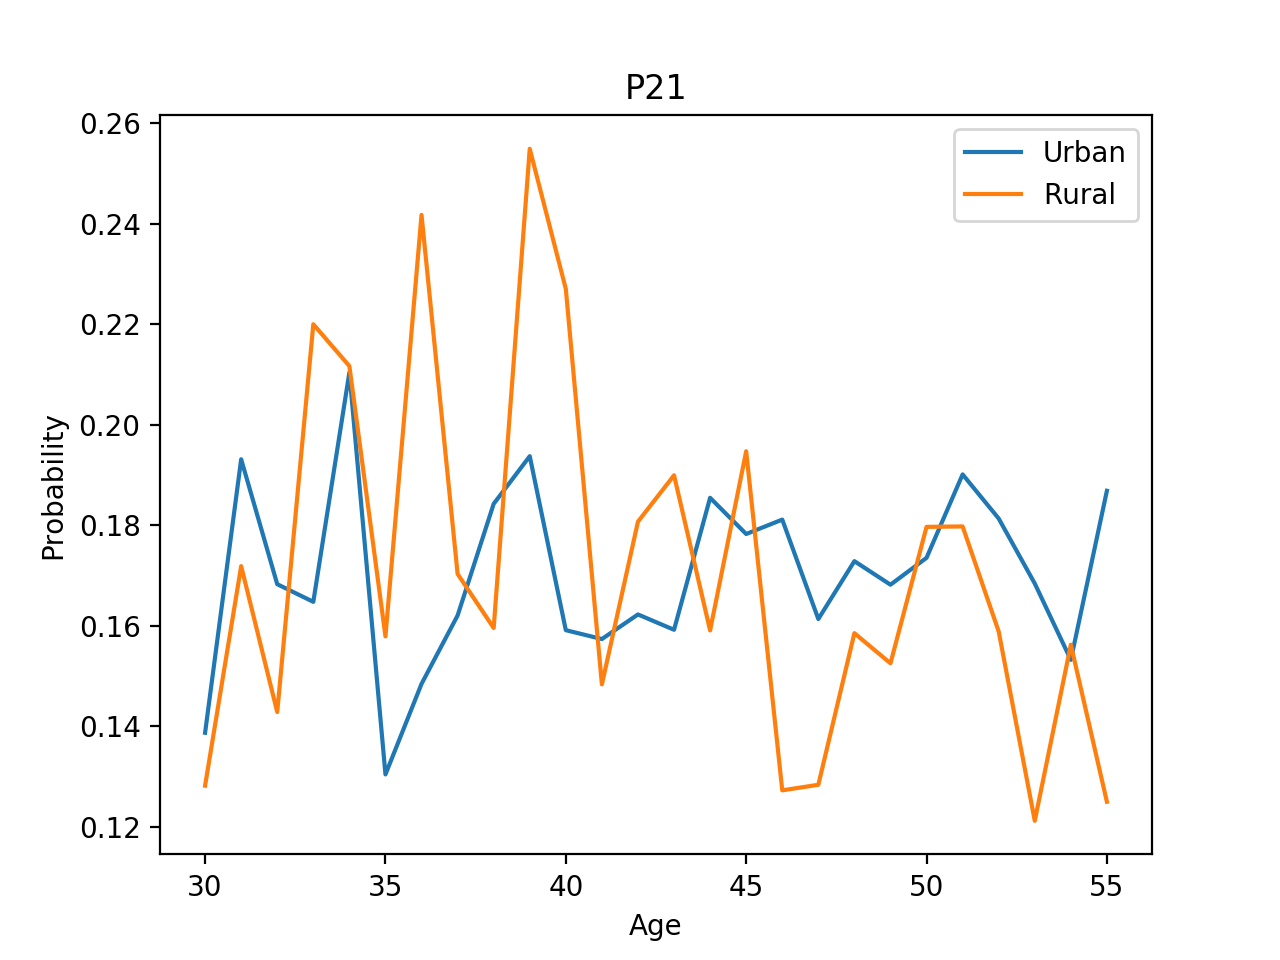

In [73]:
q21u=[]
q21r=[]
for i in markovu:
    q21u.append(i[1][0])
for i in markovr:
    q21r.append(i[1][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q21u,label='Urban')
plt.plot(age,q21r,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>


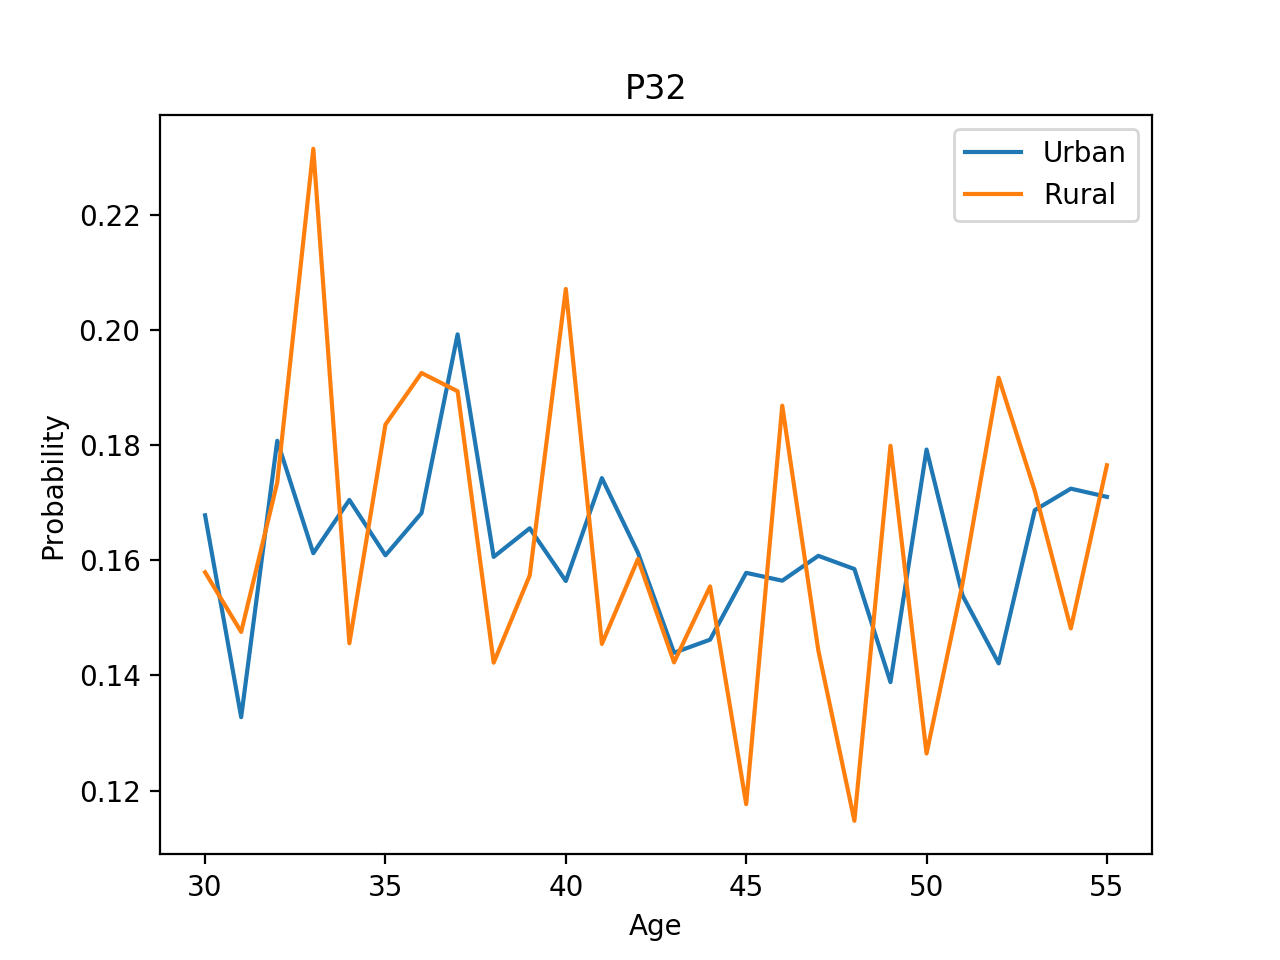

In [74]:
q32u=[]
q32r=[]
for i in markovu:
    q32u.append(i[2][1])
for i in markovr:
    q32r.append(i[2][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q32u,label='Urban')
plt.plot(age,q32r,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

<IPython.core.display.Javascript object>


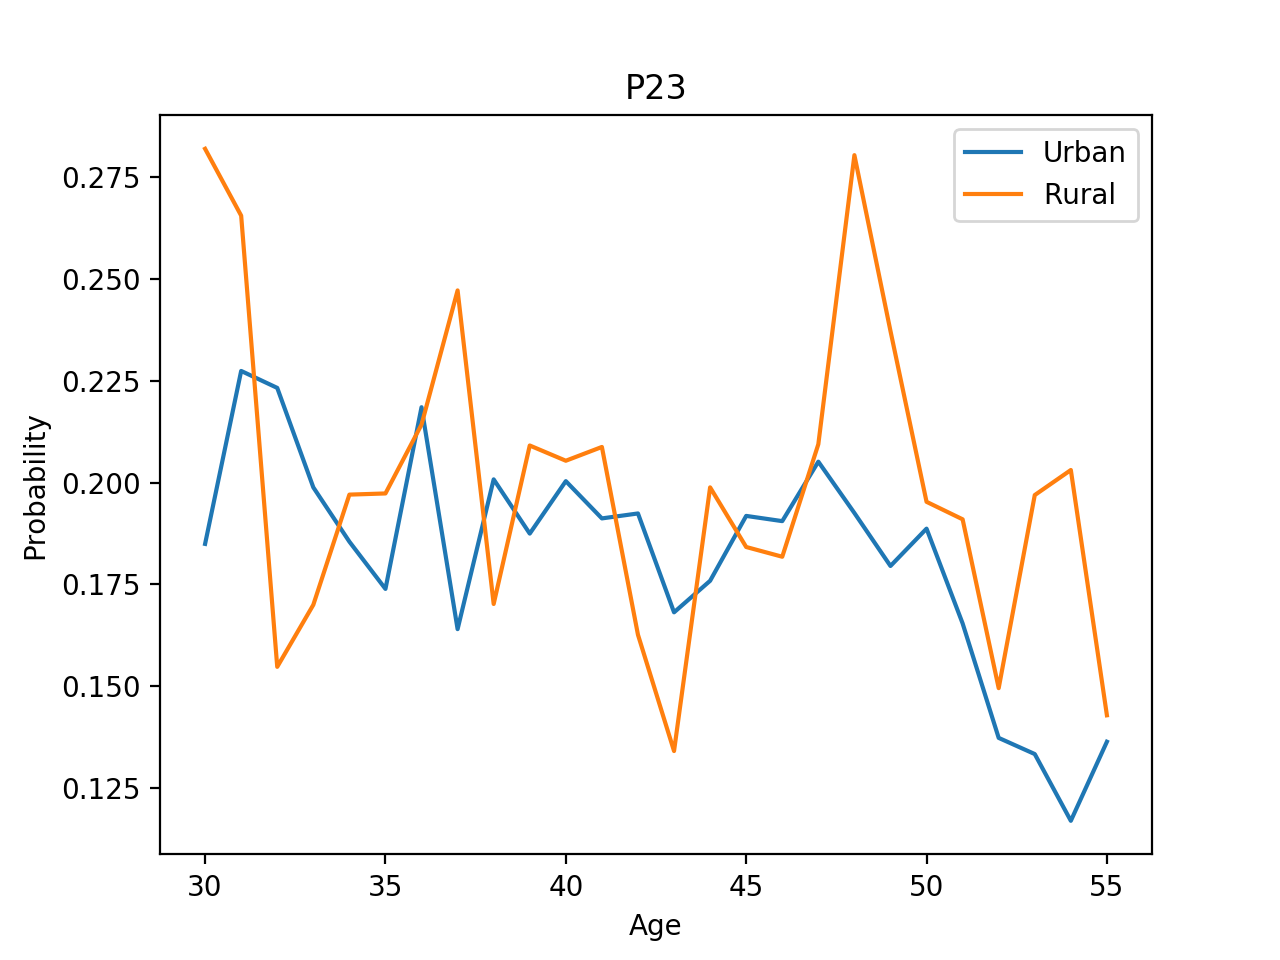

In [75]:
q23u=[]
q23r=[]
for i in markovu:
    q23u.append(i[1][2])
for i in markovr:
    q23r.append(i[1][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q23u,label='Urban')
plt.plot(age,q23r,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

<IPython.core.display.Javascript object>


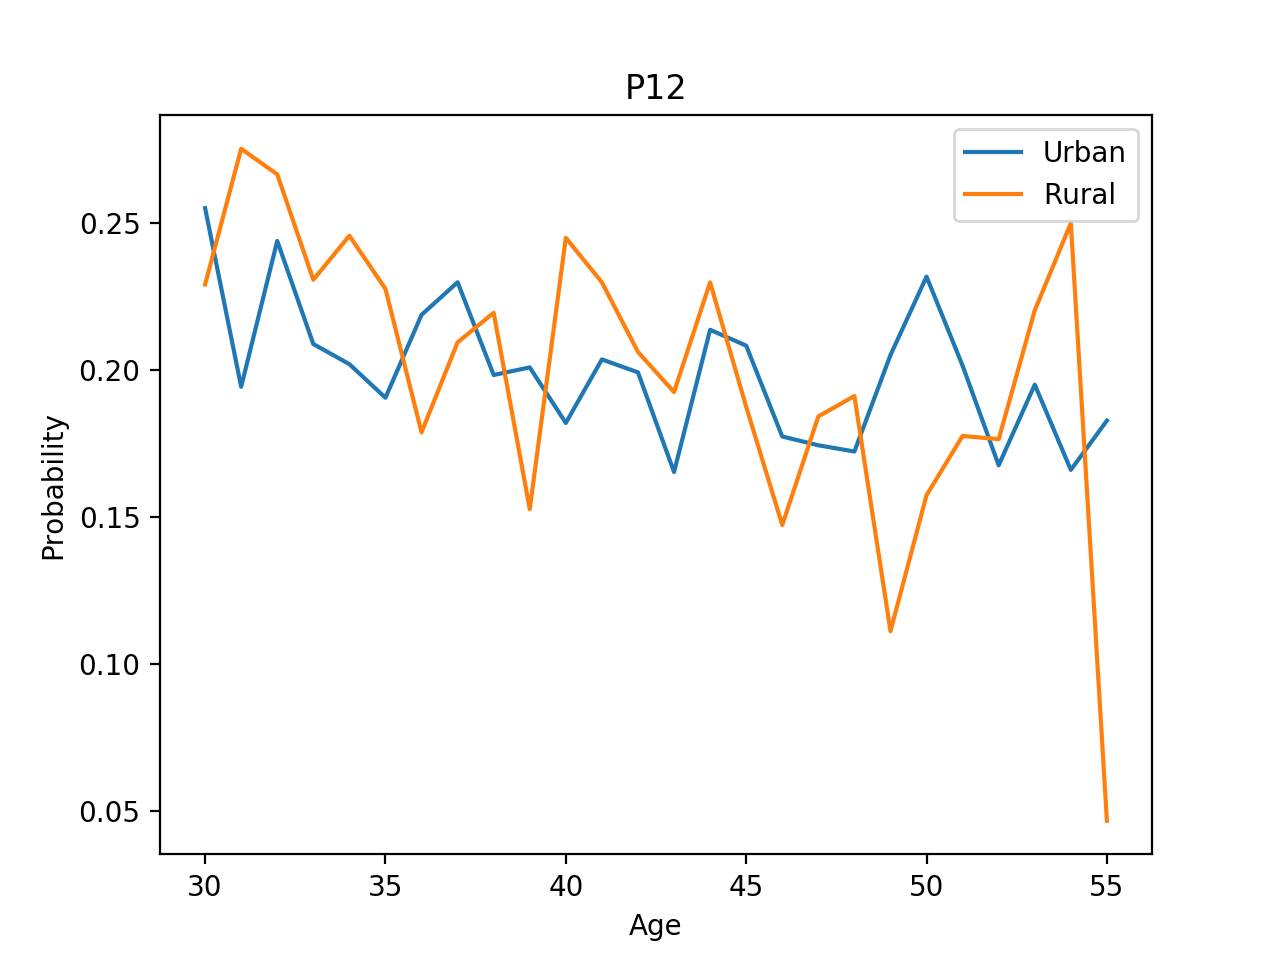

In [76]:
q12u=[]
q12r=[]
for i in markovu:
    q12u.append(i[0][1])
for i in markovr:
    q12r.append(i[0][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q12u,label='Urban')
plt.plot(age,q12r,label='Rural')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P12')
plt.legend()

Finding:
There is no obvious difference in income transition probabilities between people living in urban areas and those living in rural areas.

### Income Transition Matrices Conditional on Whether Having More Than One Child

In [77]:
med_zo=[[0]*16]*26
med_zo=np.array(med_zo)
med_tm=[[0]*16]*26
med_tm=np.array(med_tm)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        childnum=nlsydata[childindex[j]][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(childnum<=1)&(childnum>=0):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_zo[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(childnum>1):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_tm[int(age1)-30][type]+=1

In [78]:
med_zo=med_zo.reshape(26,4,4)
med_tm=med_tm.reshape(26,4,4)
print('Number matrices:\n',med_zo)
print('Number matrices:\n',med_tm)
markovzo=[]
for i in range(len(med_zo)):
    for j in range(4):
        sum_quan=sum(med_zo[i][j])
        med_zo[i][j]/max(sum_quan,0.1)
        markovzo.append(med_zo[i][j]/max(sum_quan,0.1))
markovzo=np.array(markovzo)
markovzo=markovzo.reshape(26,4,4)

markovtm=[]
for i in range(len(med_tm)):
    for j in range(4):
        sum_quan=sum(med_tm[i][j])
        med_tm[i][j]/max(sum_quan,0.1)
        markovtm.append(med_tm[i][j]/max(sum_quan,0.1))
markovtm=np.array(markovtm)
markovtm=markovtm.reshape(26,4,4)

Number matrices:
 [[[ 74  34  10   1]
  [ 21  74  28  18]
  [  3  19  58  28]
  [  7   7  18  74]]

 [[121  33   5   3]
  [ 36 104  34  10]
  [ 15  23  87  34]
  [  1   8  25 118]]

 [[145  61  16   7]
  [ 33 122  46  21]
  [ 18  45 115  51]
  [  6  12  33 176]]

 [[191  58  19   6]
  [ 41 159  44  13]
  [ 10  44 124  53]
  [ 14  10  39 195]]

 [[217  57  22   7]
  [ 61 191  63  15]
  [ 13  46 150  66]
  [  7  13  70 225]]

 [[217  47  13  11]
  [ 44 205  48  18]
  [ 13  38 144  40]
  [ 13  15  39 174]]

 [[226  67  18   3]
  [ 52 168  59  15]
  [ 20  55 141  54]
  [  5  13  47 196]]

 [[193  60   9   5]
  [ 54 162  51  13]
  [ 12  44 126  46]
  [  5   8  44 154]]

 [[185  56  17   4]
  [ 45 154  35   8]
  [ 12  29 129  44]
  [  8  10  25 145]]

 [[144  29   7   1]
  [ 36 113  32   8]
  [  7  29  89  26]
  [  3  12  31 111]]

 [[123  35   6   4]
  [ 29 120  32   8]
  [  5  21  97  24]
  [  3  10  23 130]]

 [[102  33   4   4]
  [ 19 103  24   7]
  [  4  21  92  25]
  [  4   5  19  77]]

<IPython.core.display.Javascript object>


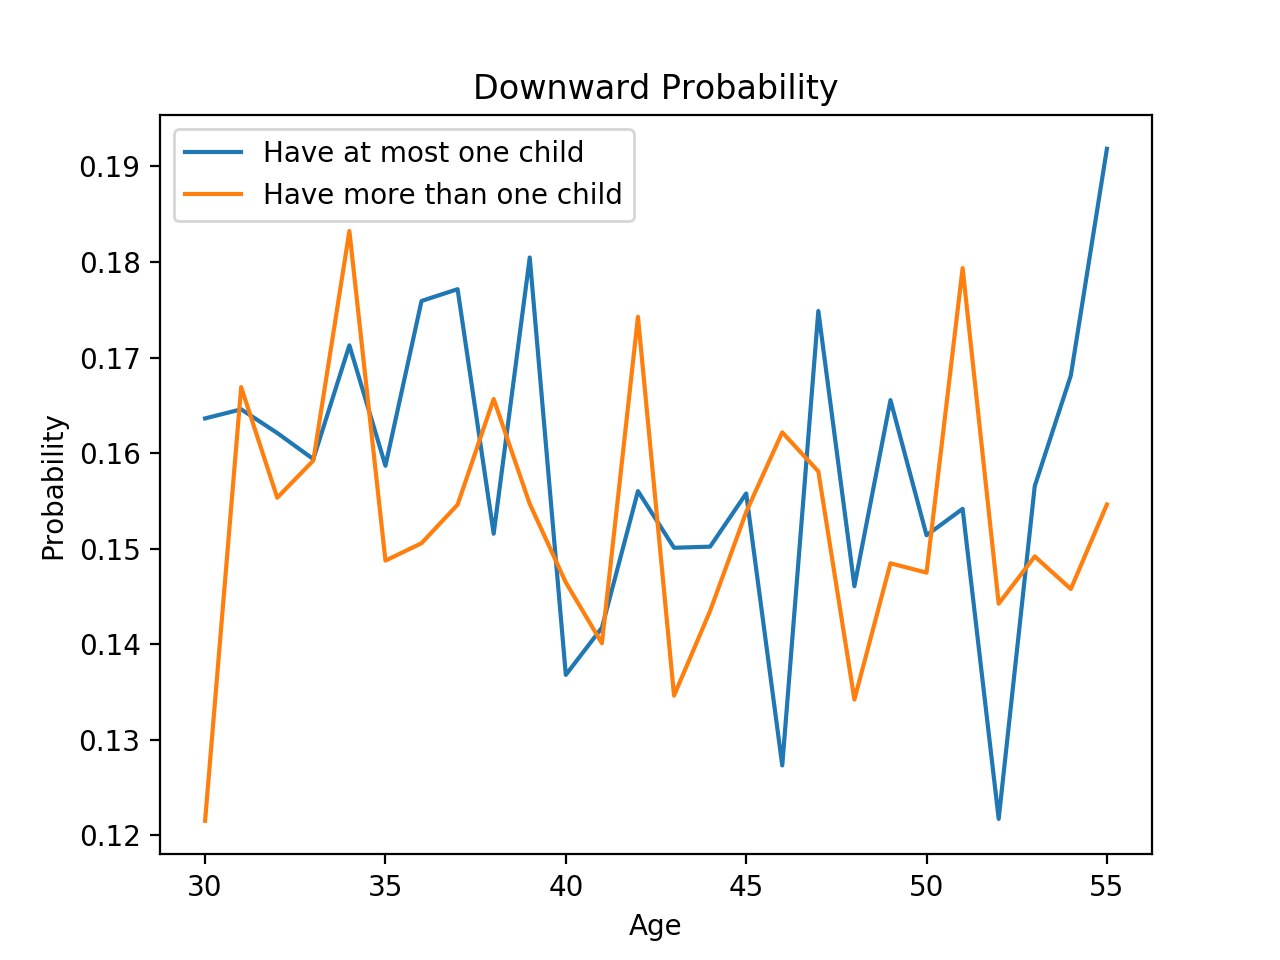

In [81]:
qdownzo=[]
qdowntm=[]
for i in markovzo:
    qdownzo.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
for i in markovtm:
    qdowntm.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownzo,label='Have at most one child')
plt.plot(age,qdowntm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>


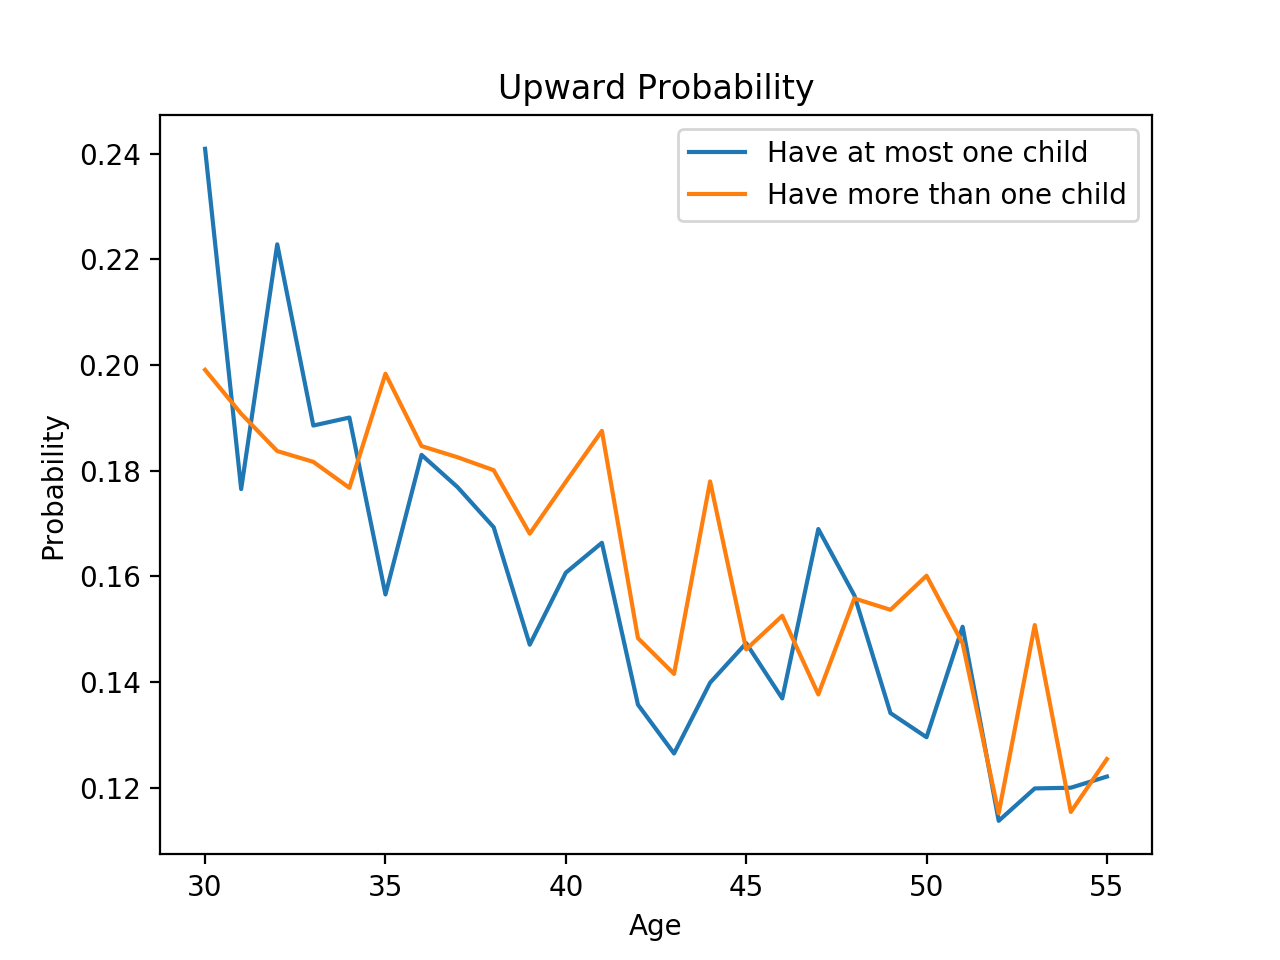

In [82]:
qupzo=[]
quptm=[]
for i in markovzo:
    qupzo.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovtm:
    quptm.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))

age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qupzo,label='Have at most one child')
plt.plot(age,quptm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

<IPython.core.display.Javascript object>


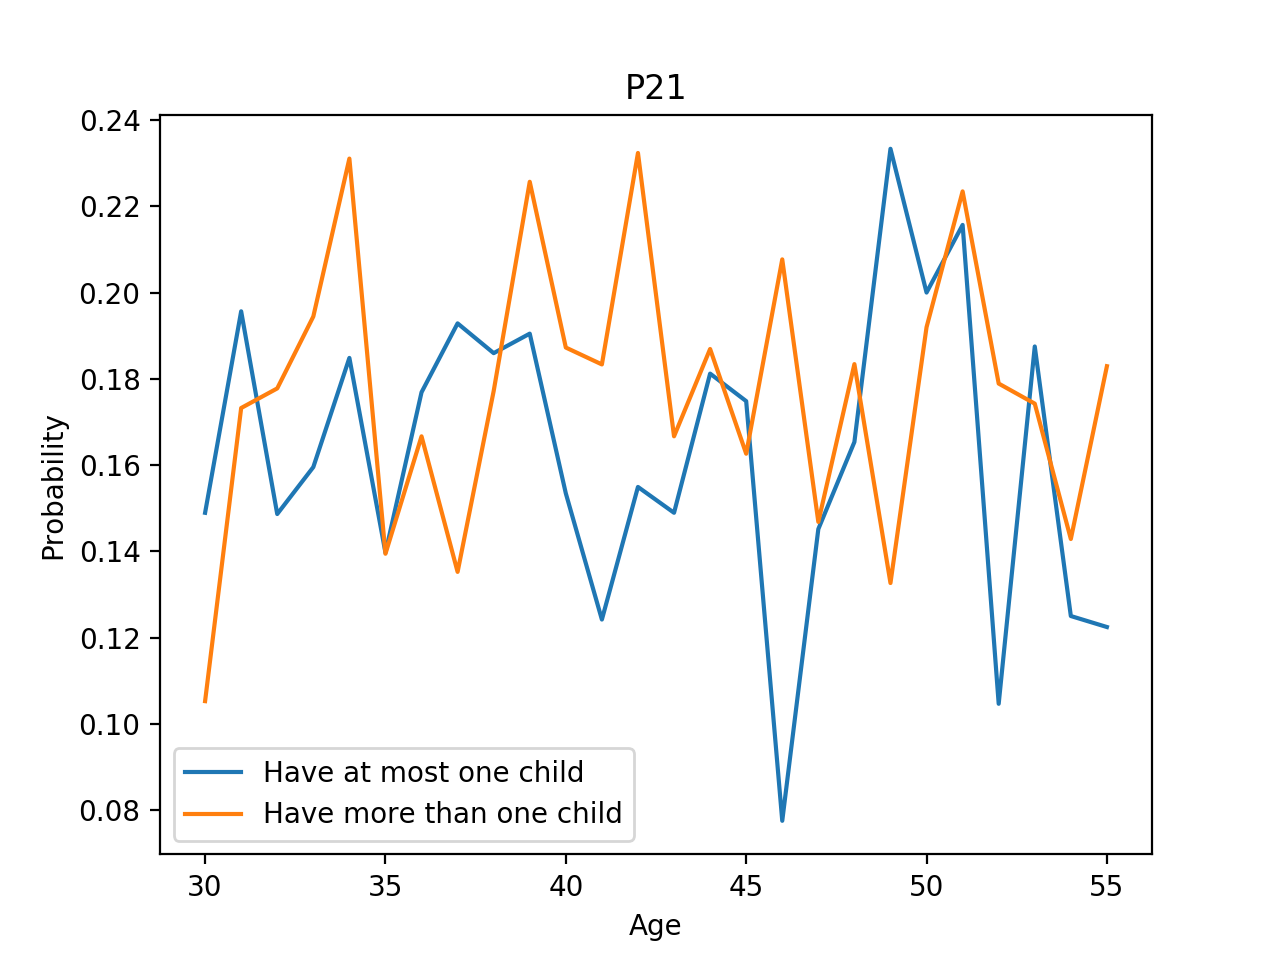

In [83]:
q21zo=[]
q21tm=[]
for i in markovzo:
    q21zo.append(i[1][0])
for i in markovtm:
    q21tm.append(i[1][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q21zo,label='Have at most one child')
plt.plot(age,q21tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>


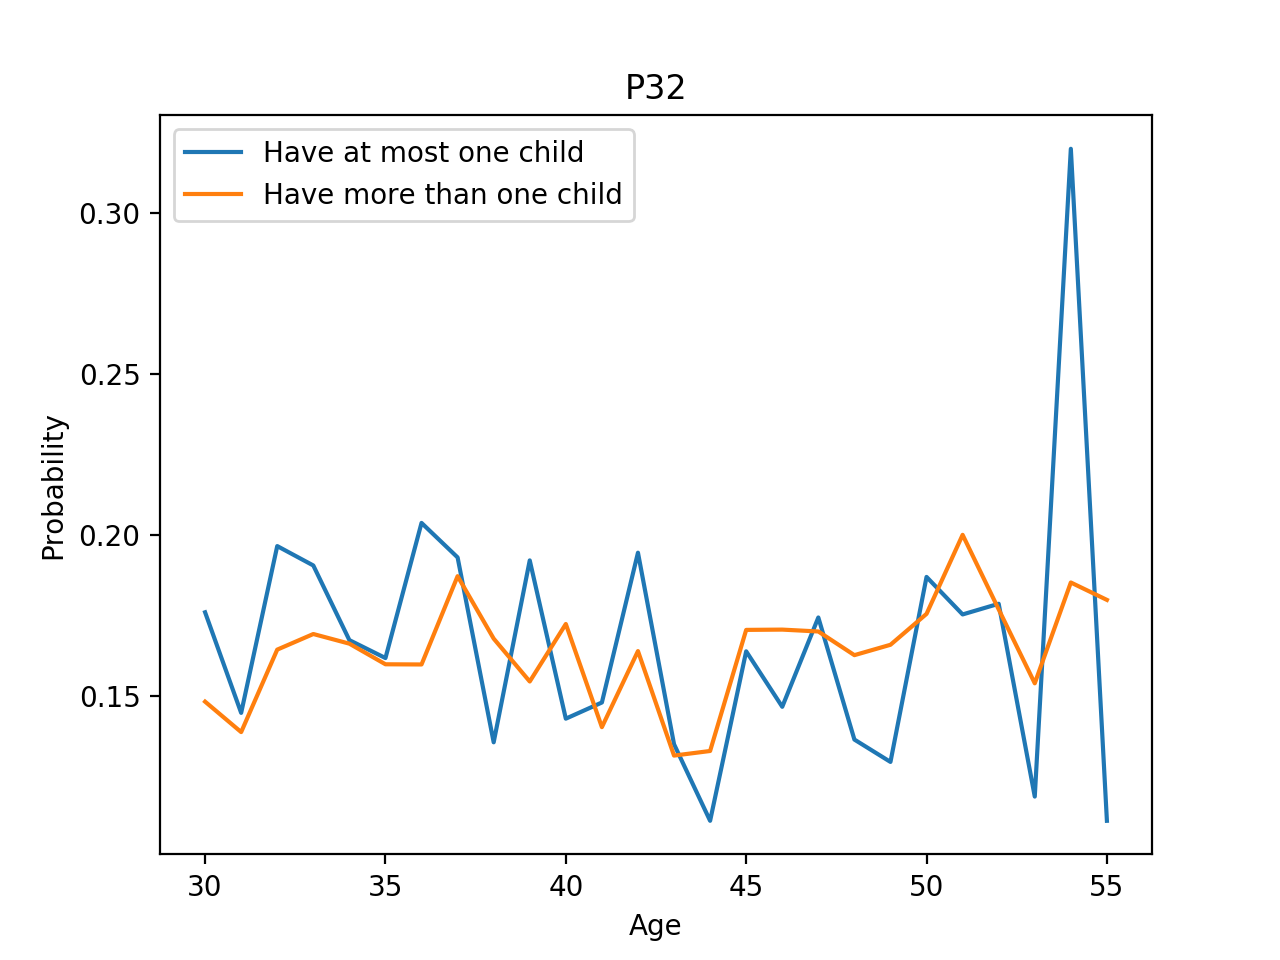

In [84]:
q32zo=[]
q32tm=[]
for i in markovzo:
    q32zo.append(i[2][1])
for i in markovtm:
    q32tm.append(i[2][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q32zo,label='Have at most one child')
plt.plot(age,q32tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

<IPython.core.display.Javascript object>


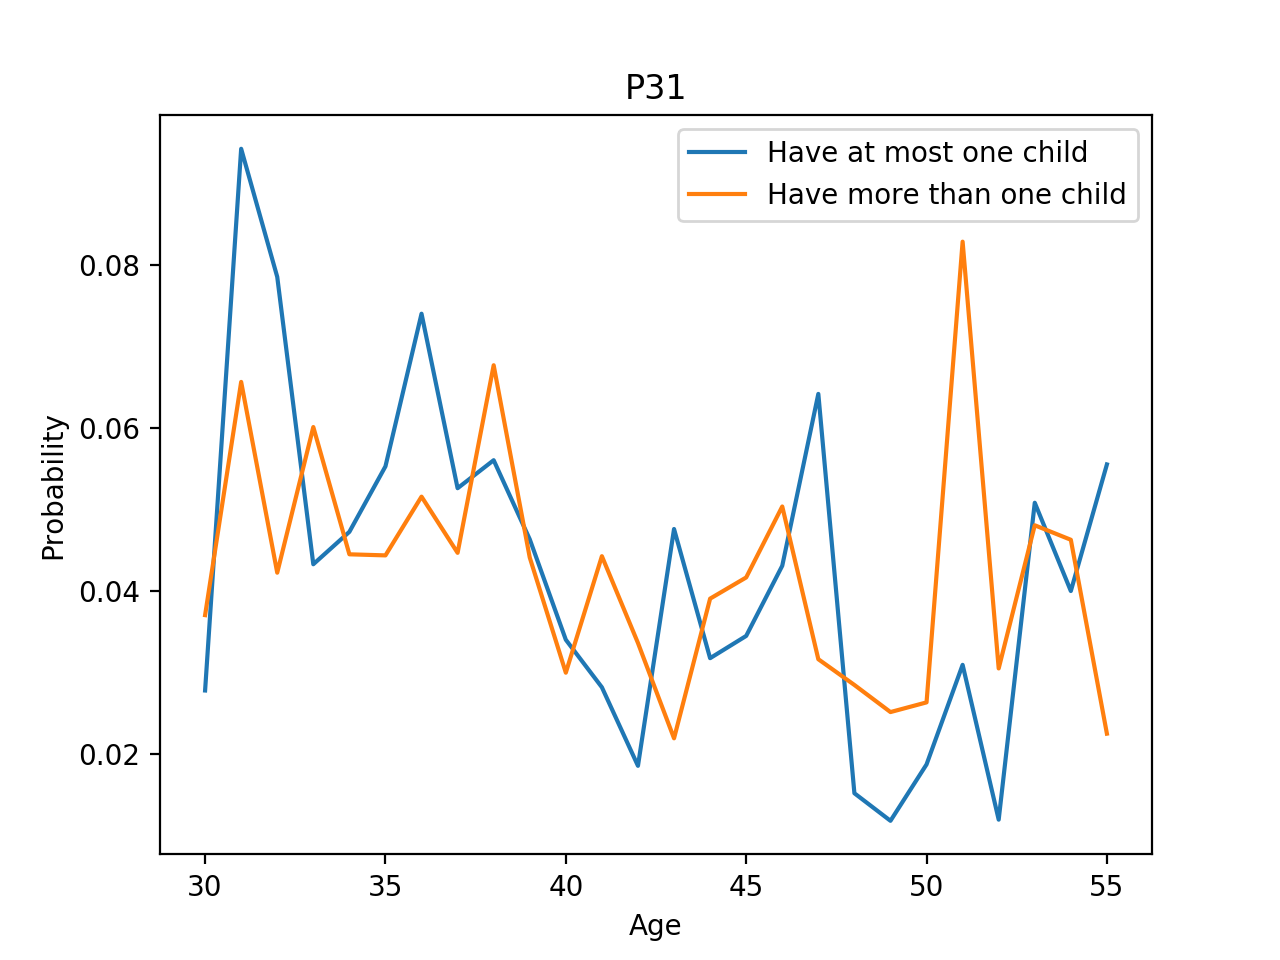

In [85]:
q31zo=[]
q31tm=[]
for i in markovzo:
    q31zo.append(i[2][0])
for i in markovtm:
    q31tm.append(i[2][0])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q31zo,label='Have at most one child')
plt.plot(age,q31tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P31')
plt.legend()

<IPython.core.display.Javascript object>


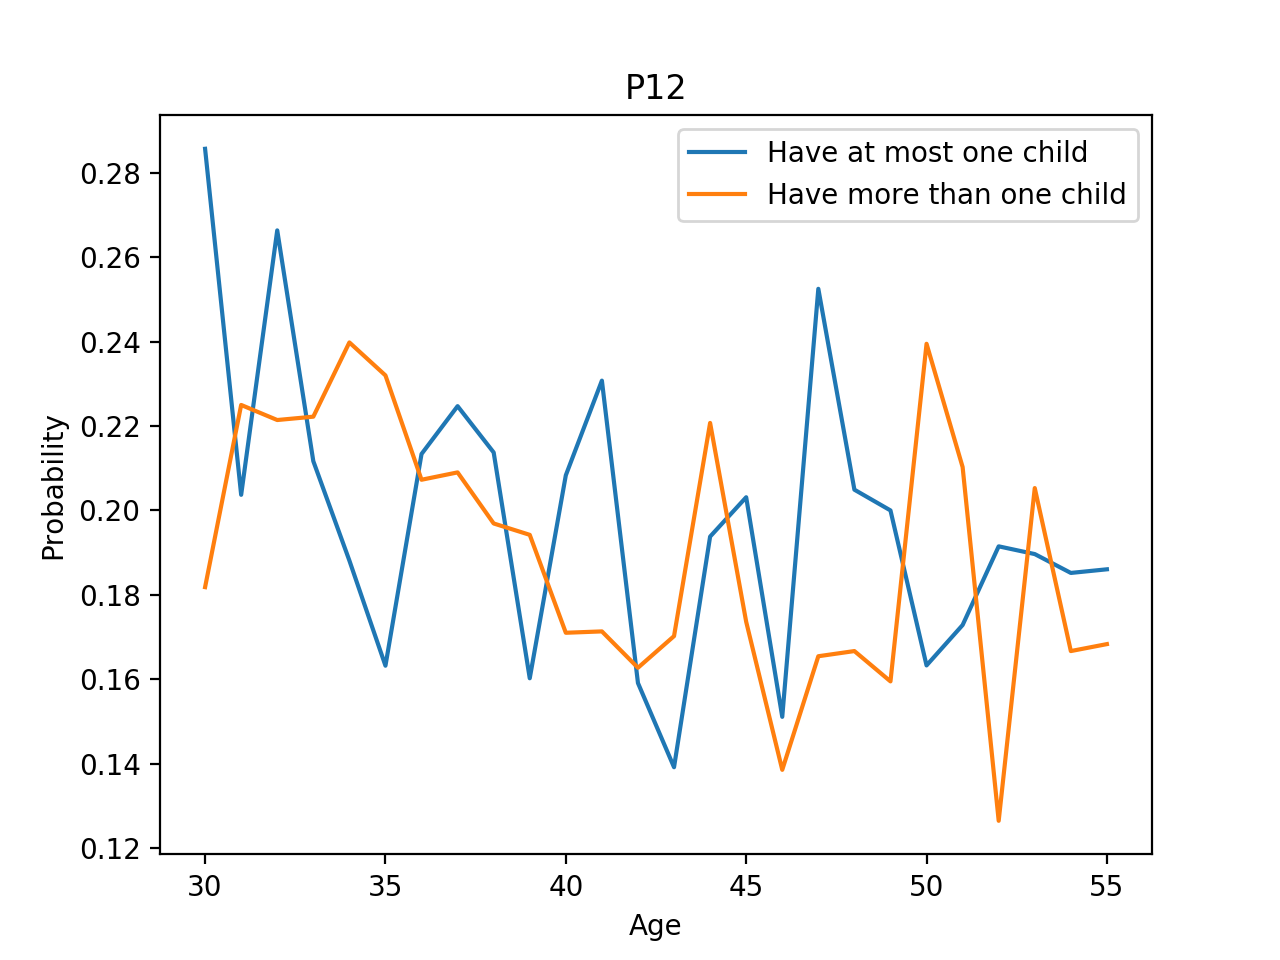

In [86]:
q12zo=[]
q12tm=[]
for i in markovzo:
    q12zo.append(i[0][1])
for i in markovtm:
    q12tm.append(i[0][1])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q12zo,label='Have at most one child')
plt.plot(age,q12tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P12')
plt.legend()

<IPython.core.display.Javascript object>


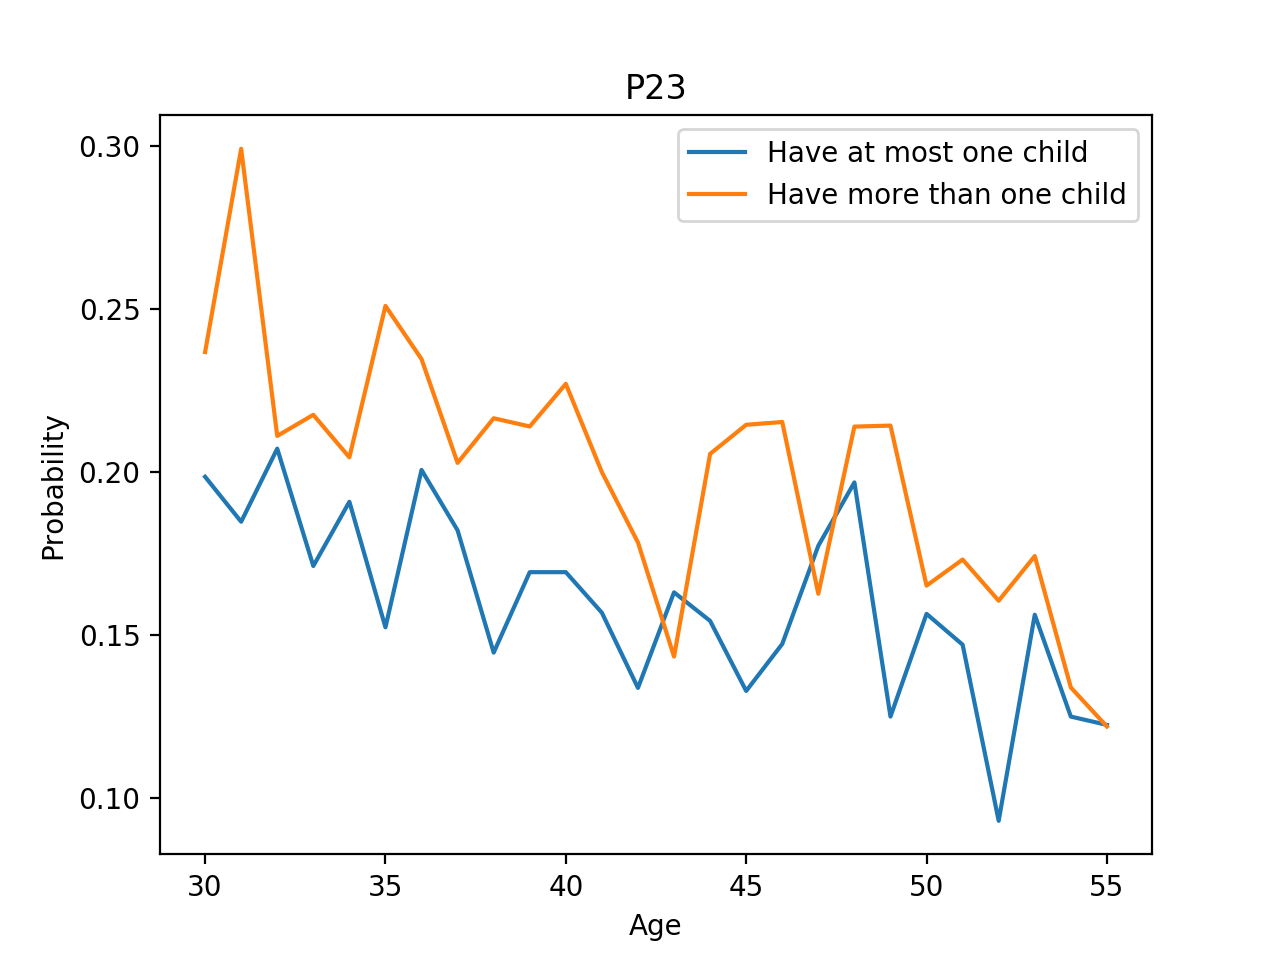

In [87]:
q23zo=[]
q23tm=[]
for i in markovzo:
    q23zo.append(i[1][2])
for i in markovtm:
    q23tm.append(i[1][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q23zo,label='Have at most one child')
plt.plot(age,q23tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

<IPython.core.display.Javascript object>


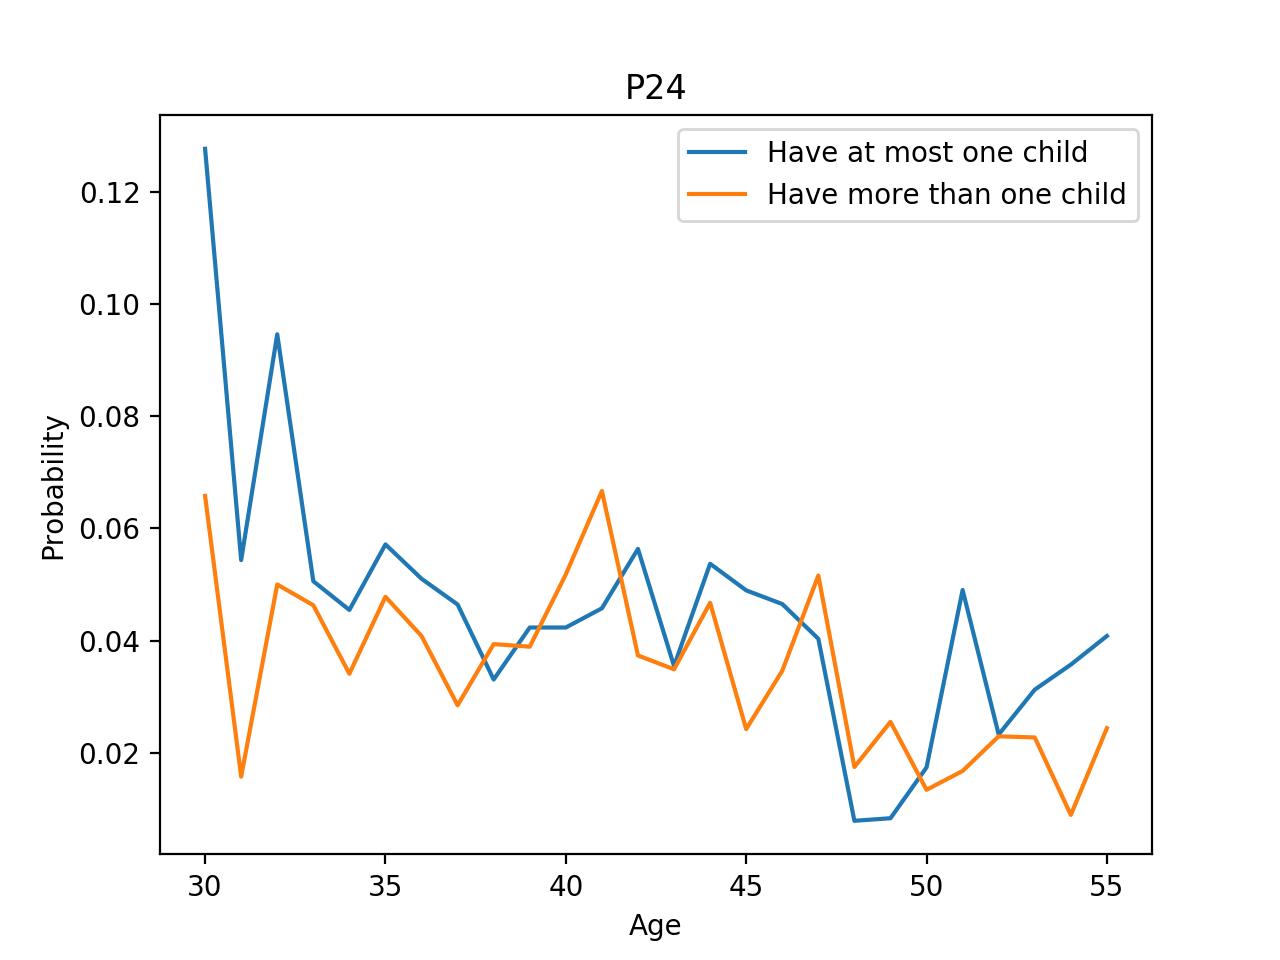

In [88]:
q24zo=[]
q24tm=[]
for i in markovzo:
    q24zo.append(i[1][3])
for i in markovtm:
    q24tm.append(i[1][3])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q24zo,label='Have at most one child')
plt.plot(age,q24tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P24')
plt.legend()

<IPython.core.display.Javascript object>


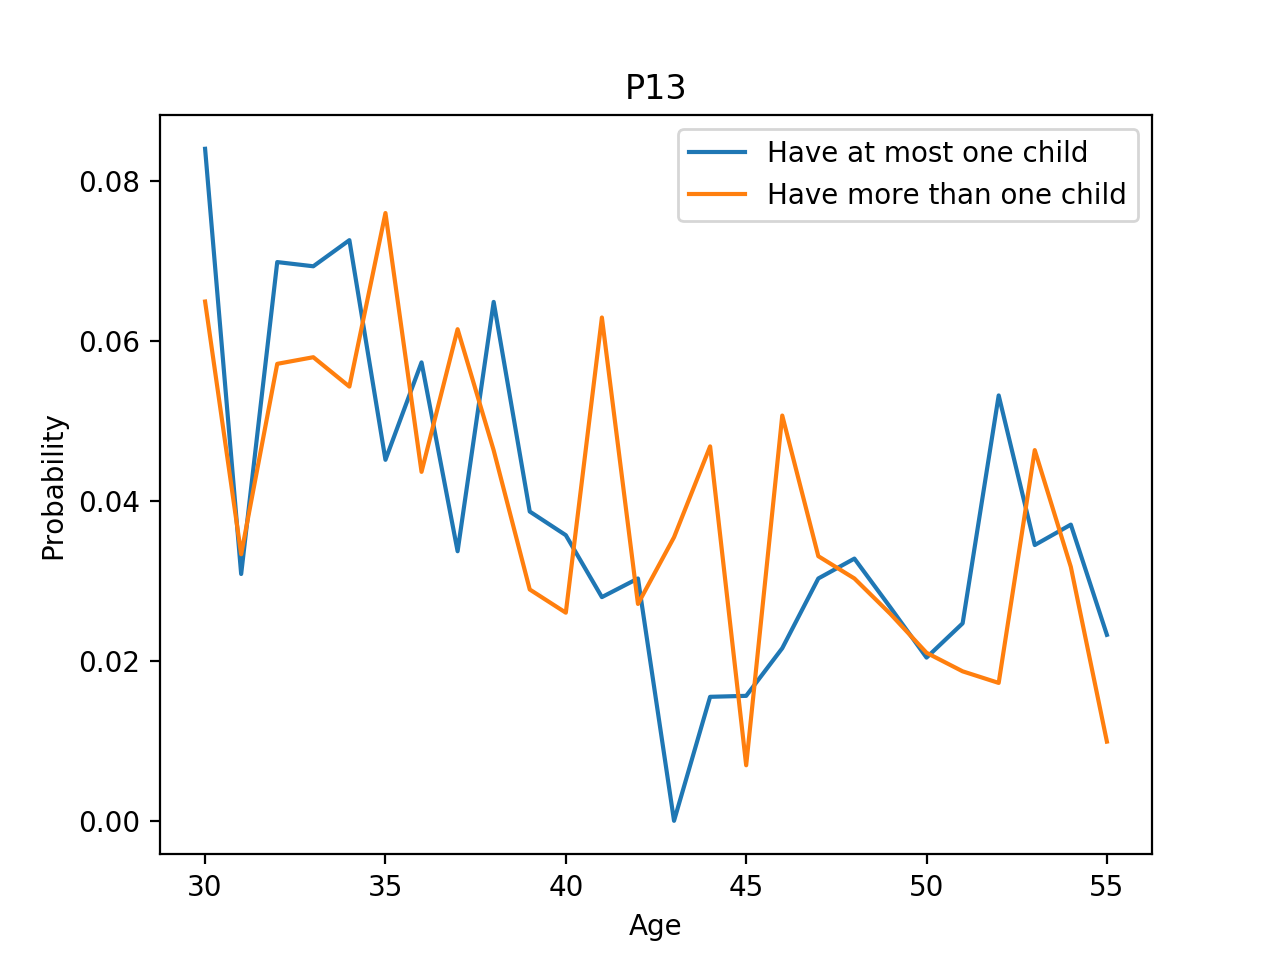

In [89]:
q13zo=[]
q13tm=[]
for i in markovzo:
    q13zo.append(i[0][2])
for i in markovtm:
    q13tm.append(i[0][2])
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,q13zo,label='Have at most one child')
plt.plot(age,q13tm,label='Have more than one child')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P13')
plt.legend()

### Finding:
The income transition probabilities are similar between people who have at most one child and those who have more than one child. The only probability that shows significant differences between the two groups are p23. Those who have more than one child has much higher p23 than the people who have at most one child.

### Income Transition Matrices Conditional on Whether Having Health Limitations

In [90]:
med_hea=[[0]*16]*26
med_hea=np.array(med_hea)
med_unhea=[[0]*16]*26
med_unhea=np.array(med_unhea)
for i in range(len(nlsydata)):
    for j in range(len(incindex)-1):
        type=16
        health=nlsydata[healthindex[j]][i]
        age1=nlsydata[ageindex[j]][i]
        inc=nlsydata[incindex[j]][i]
        age2=nlsydata[ageindex[j+1]][i]
        inc2=nlsydata[incindex[j+1]][i]
        if (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(health==0):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_hea[int(age1)-30][type]+=1
        elif (age1>=30) & (age2>=30) & (age1<=55) &(age2<=57) & (inc>=0) & (inc2>=0) &(health==1):
            if (inc<0.25) & (inc2<0.25):
                type=0
            elif (inc<0.25) & (inc2>=0.25) & (inc2<0.5):
                type=1
            elif (inc<0.25) & (inc2>=0.5) & (inc2<0.75):
                type=2
            elif (inc<0.25) & (inc2>=0.75):
                type=3
            elif (inc<0.5) & (inc>=0.25) & (inc2<0.25):
                type=4
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.25) & (inc2<0.5):
                type=5
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.5) & (inc2<0.75):
                type=6
            elif (inc<0.5) & (inc>=0.25) & (inc2>=0.75):
                type=7
            elif (inc<0.75) & (inc>=0.5) & (inc2<0.25):
                type=8
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.25) & (inc2<0.5):
                type=9
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.5) & (inc2<0.75):
                type=10
            elif (inc<0.75) & (inc>=0.5) & (inc2>=0.75):
                type=11
            elif (inc>=0.75) & (inc2<0.25):
                type=12
            elif (inc>=0.75) & (inc2>=0.25) & (inc2<0.5):
                type=13
            elif (inc>=0.75) & (inc2>=0.5) & (inc2<0.75):
                type=14
            elif (inc>=0.75) & (inc2>=0.75):
                type=15
            med_unhea[int(age1)-30][type]+=1

In [91]:
med_hea=med_hea.reshape(26,4,4)
med_unhea=med_unhea.reshape(26,4,4)
print('Number matrices:\n',med_hea)
print('Number matrices:\n',med_unhea)
markovhea=[]
for i in range(len(med_hea)):
    for j in range(4):
        sum_quan=sum(med_hea[i][j])
        med_hea[i][j]/max(sum_quan,0.1)
        markovhea.append(med_hea[i][j]/max(sum_quan,0.1))
markovhea=np.array(markovhea)
markovhea=markovhea.reshape(26,4,4)

markovunhea=[]
for i in range(len(med_unhea)):
    for j in range(4):
        sum_quan=sum(med_unhea[i][j])
        med_unhea[i][j]/max(sum_quan,0.1)
        markovunhea.append(med_unhea[i][j]/max(sum_quan,0.1))
markovunhea=np.array(markovunhea)
markovunhea=markovunhea.reshape(26,4,4)

Number matrices:
 [[[101  45  15   1]
  [ 23 118  43  22]
  [  5  30 100  47]
  [  8  10  23 108]]

 [[170  56   9   2]
  [ 54 165  69  12]
  [ 23  40 163  60]
  [  3  10  47 186]]

 [[193  86  23   9]
  [ 61 210  81  29]
  [ 24  70 242  82]
  [  6  22  60 301]]

 [[263  99  27   8]
  [ 71 264  90  22]
  [ 22  83 271  97]
  [ 16  19  74 372]]

 [[284  93  31  12]
  [111 313 111  22]
  [ 28  92 358 108]
  [ 16  29 117 418]]

 [[310  94  28  12]
  [ 72 363 109  27]
  [ 26  94 360  99]
  [ 20  27 112 449]]

 [[359 123  30  11]
  [ 87 360 139  26]
  [ 42 133 436 140]
  [ 14  26 126 531]]

 [[320 120  21  14]
  [ 99 407 132  25]
  [ 30 128 395 133]
  [ 15  22 125 524]]

 [[352 121  33  15]
  [101 382 128  25]
  [ 30 108 417 145]
  [ 18  33 116 524]]

 [[335  96  22   6]
  [106 338 111  26]
  [ 15  99 381 115]
  [ 12  27 113 498]]

 [[335 117  20  23]
  [108 380 135  30]
  [ 22 113 417 108]
  [ 10  32 112 555]]

 [[346 128  28  18]
  [ 88 392 130  30]
  [ 19 119 441 148]
  [ 13  35 110 551]]

<IPython.core.display.Javascript object>


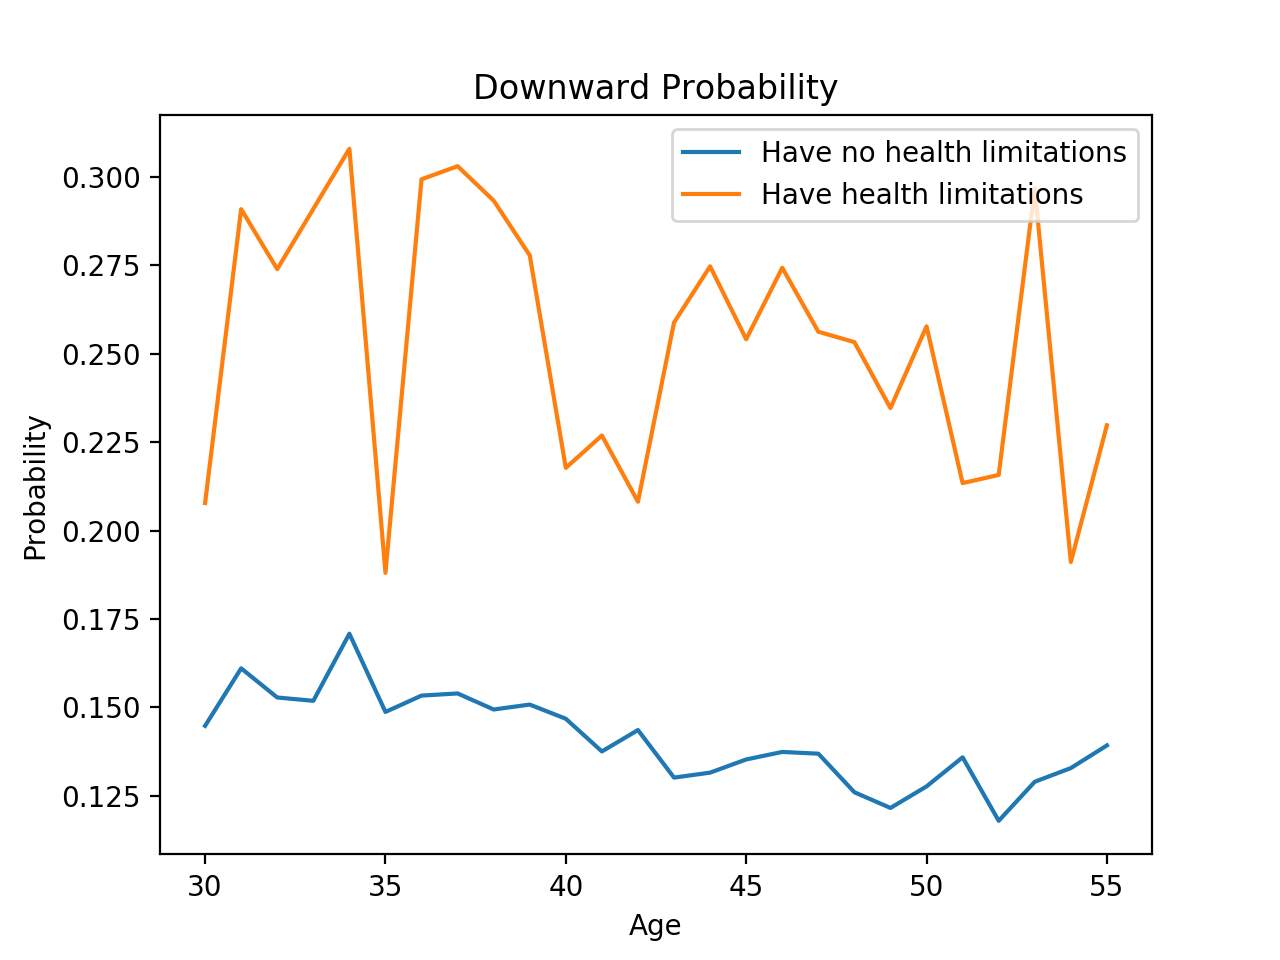

In [92]:
qdownhea=[]
qdownunhea=[]
for i in markovhea:
    qdownhea.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
for i in markovunhea:
    qdownunhea.append((i[1][0]+i[2][1]+i[2][0]+i[3][0]+i[3][1]+i[3][2])/4)
age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,qdownhea,label='Have no health limitations')
plt.plot(age,qdownunhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Probability')
plt.legend()

<IPython.core.display.Javascript object>


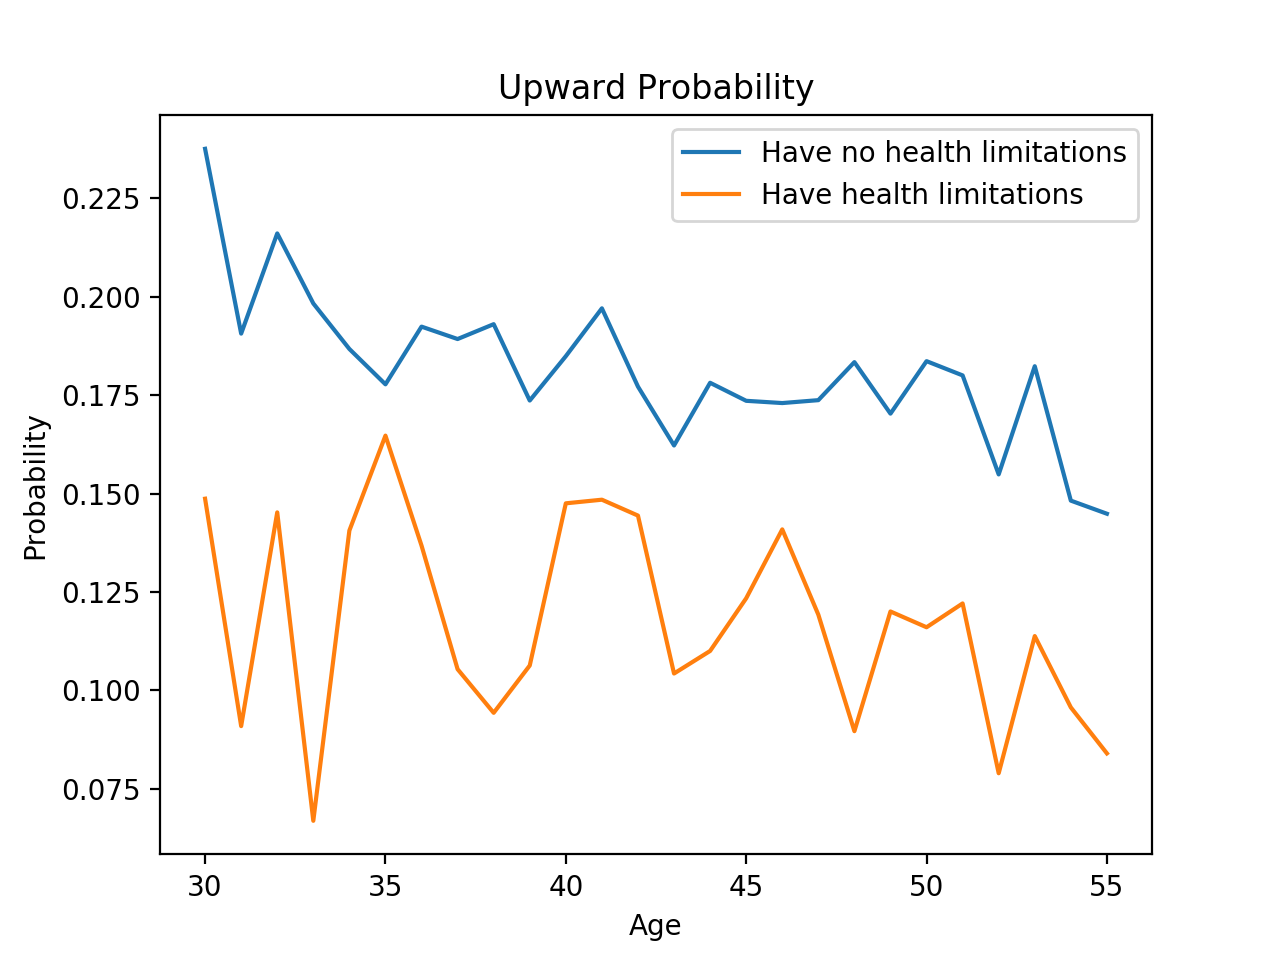

In [93]:
quphea=[]
qupunhea=[]
for i in markovhea:
    quphea.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))
for i in markovunhea:
    qupunhea.append(((i[0][1]+i[1][2]+i[0][2]+i[0][3]+i[1][3]+i[2][3])/4))

age=np.arange(30,30+len(q11))
%matplotlib notebook
plt.plot(age,quphea,label='Have no health limitations')
plt.plot(age,qupunhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Probability')
plt.legend()

<IPython.core.display.Javascript object>


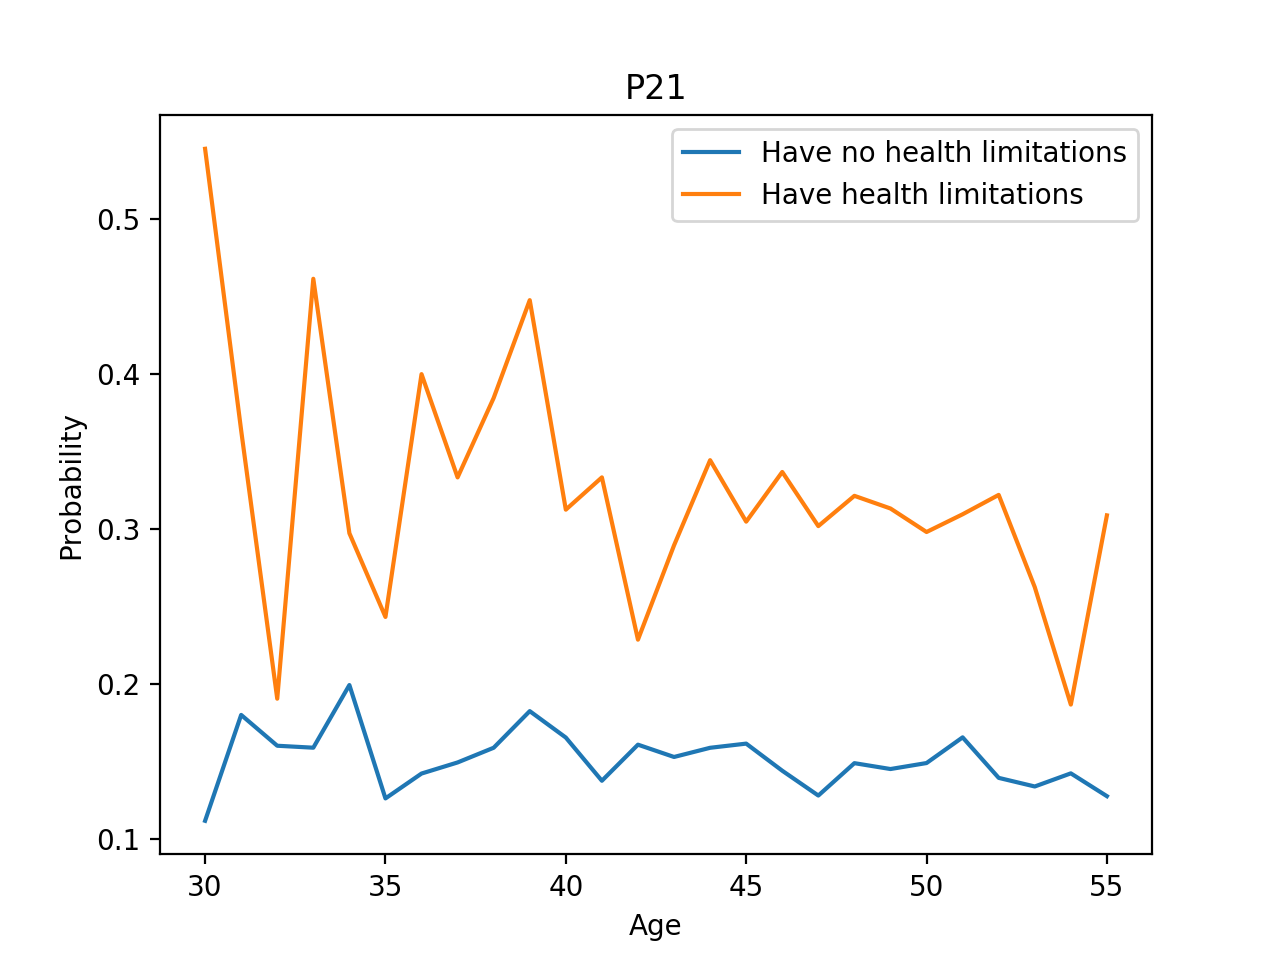

In [94]:
q21hea=[]
q21unhea=[]
for i in markovhea:
    q21hea.append(i[1][0])
for i in markovunhea:
    q21unhea.append(i[1][0])
%matplotlib notebook
plt.plot(age,q21hea,label='Have no health limitations')
plt.plot(age,q21unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21')
plt.legend()

<IPython.core.display.Javascript object>


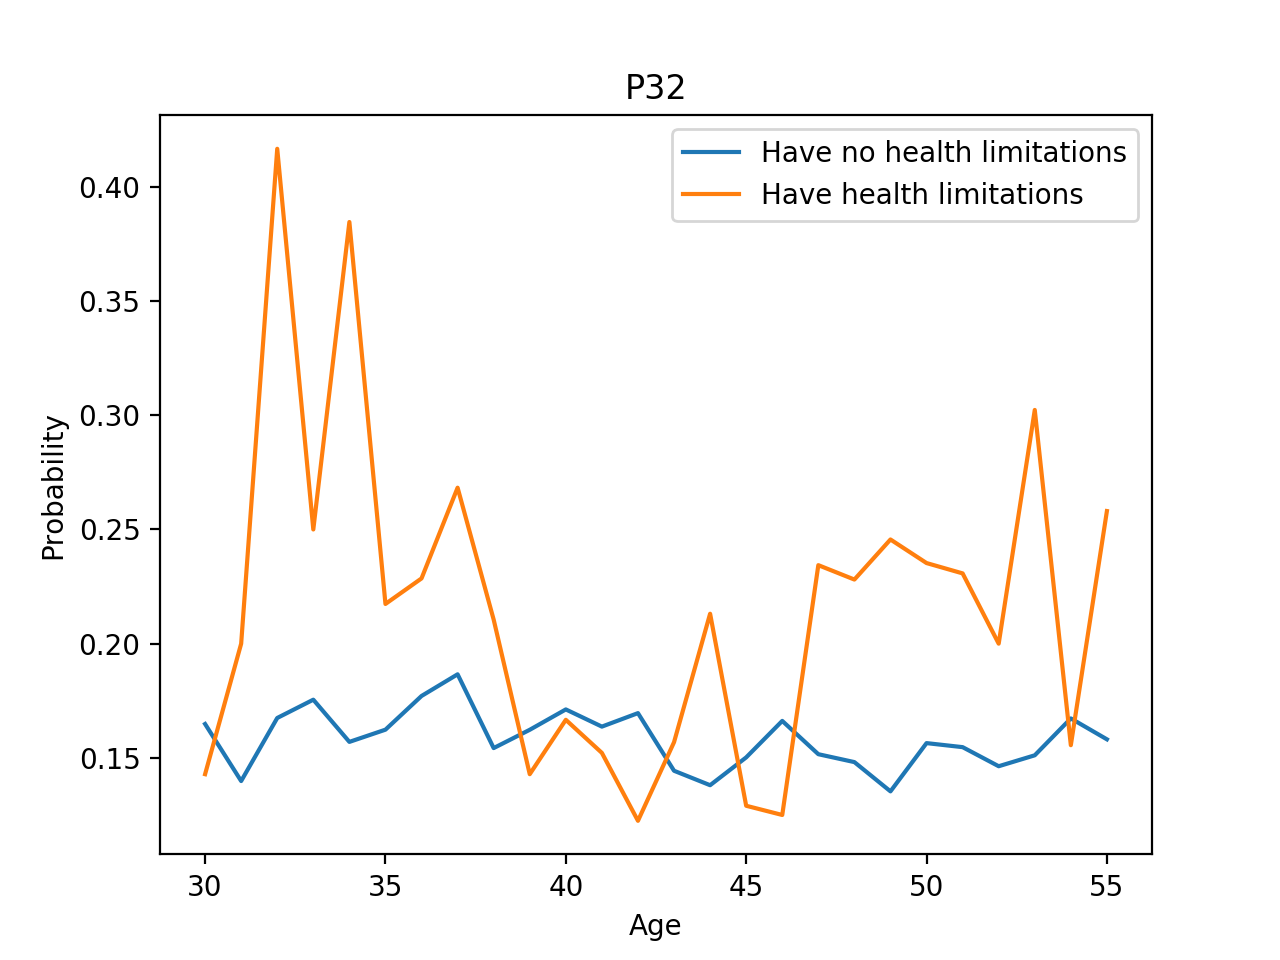

In [95]:
q32hea=[]
q32unhea=[]
for i in markovhea:
    q32hea.append(i[2][1])
for i in markovunhea:
    q32unhea.append(i[2][1])
%matplotlib notebook
plt.plot(age,q32hea,label='Have no health limitations')
plt.plot(age,q32unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P32')
plt.legend()

<IPython.core.display.Javascript object>


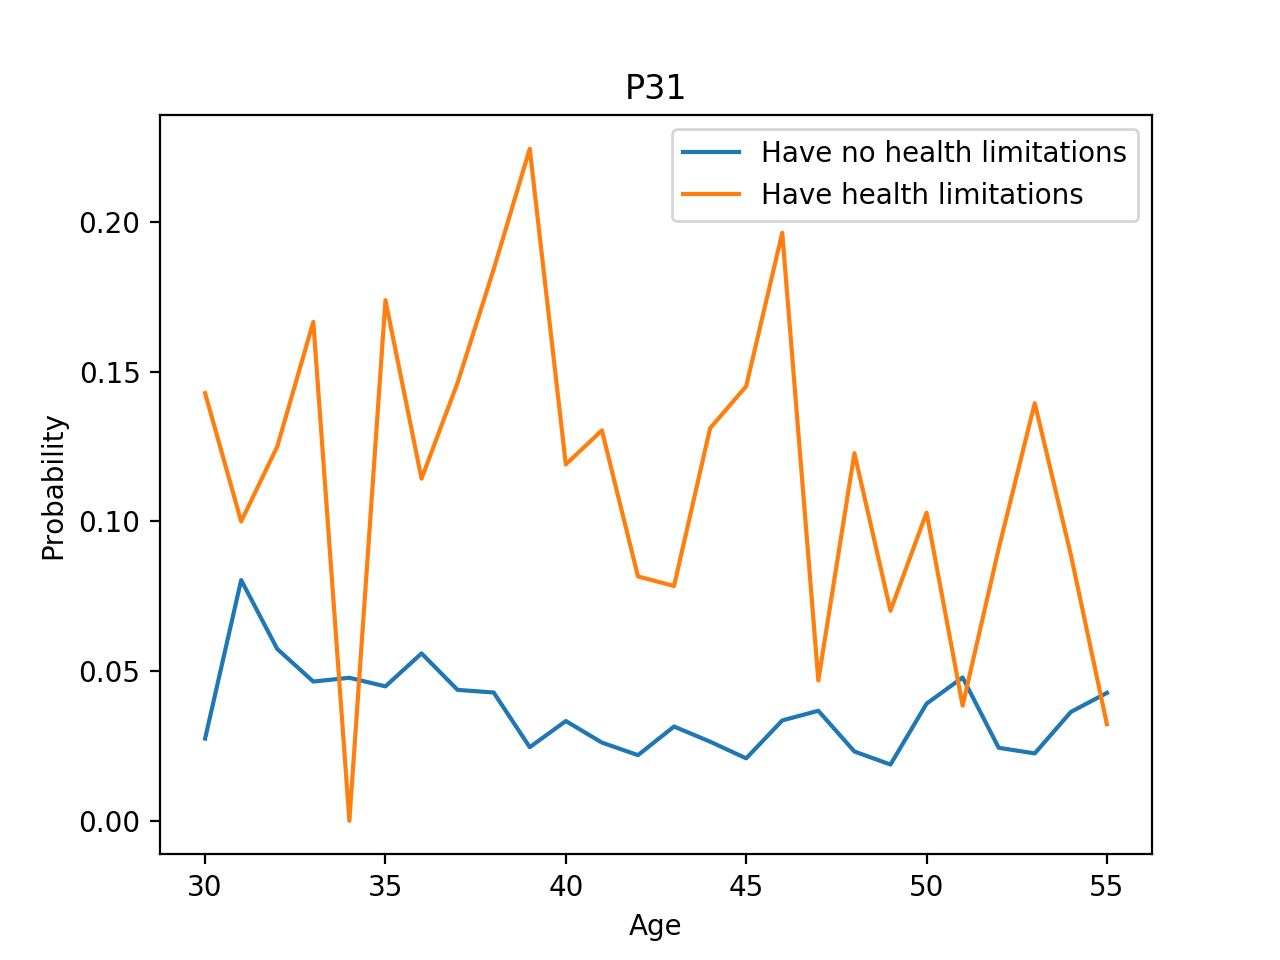

In [96]:
q31hea=[]
q31unhea=[]
for i in markovhea:
    q31hea.append(i[2][0])
for i in markovunhea:
    q31unhea.append(i[2][0])
%matplotlib notebook
plt.plot(age,q31hea,label='Have no health limitations')
plt.plot(age,q31unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P31')
plt.legend()

<IPython.core.display.Javascript object>


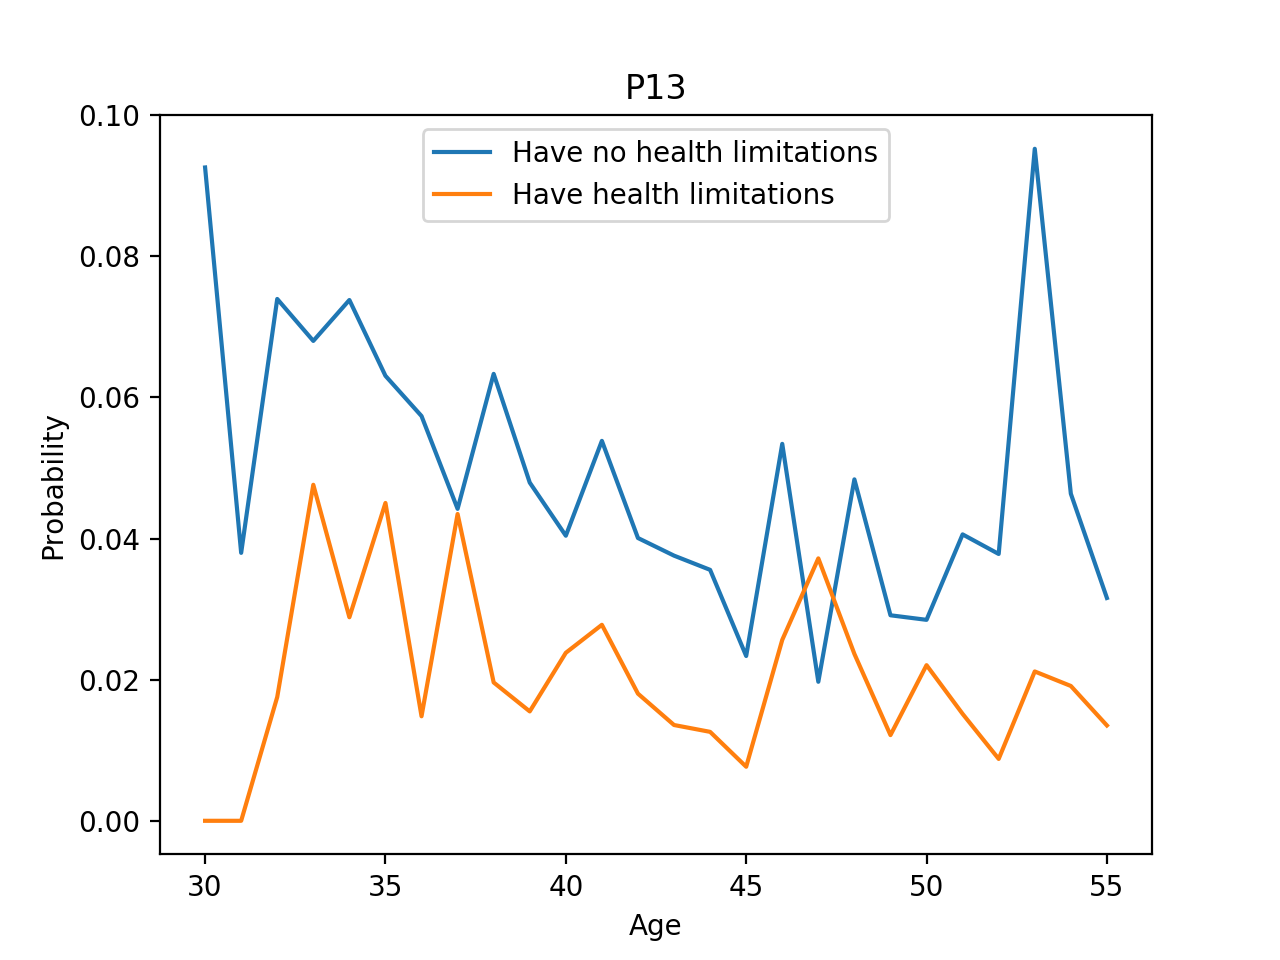

In [97]:
q13hea=[]
q13unhea=[]
for i in markovhea:
    q13hea.append(i[0][2])
for i in markovunhea:
    q13unhea.append(i[0][2])
%matplotlib notebook
plt.plot(age,q13hea,label='Have no health limitations')
plt.plot(age,q13unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P13')
plt.legend()

<IPython.core.display.Javascript object>


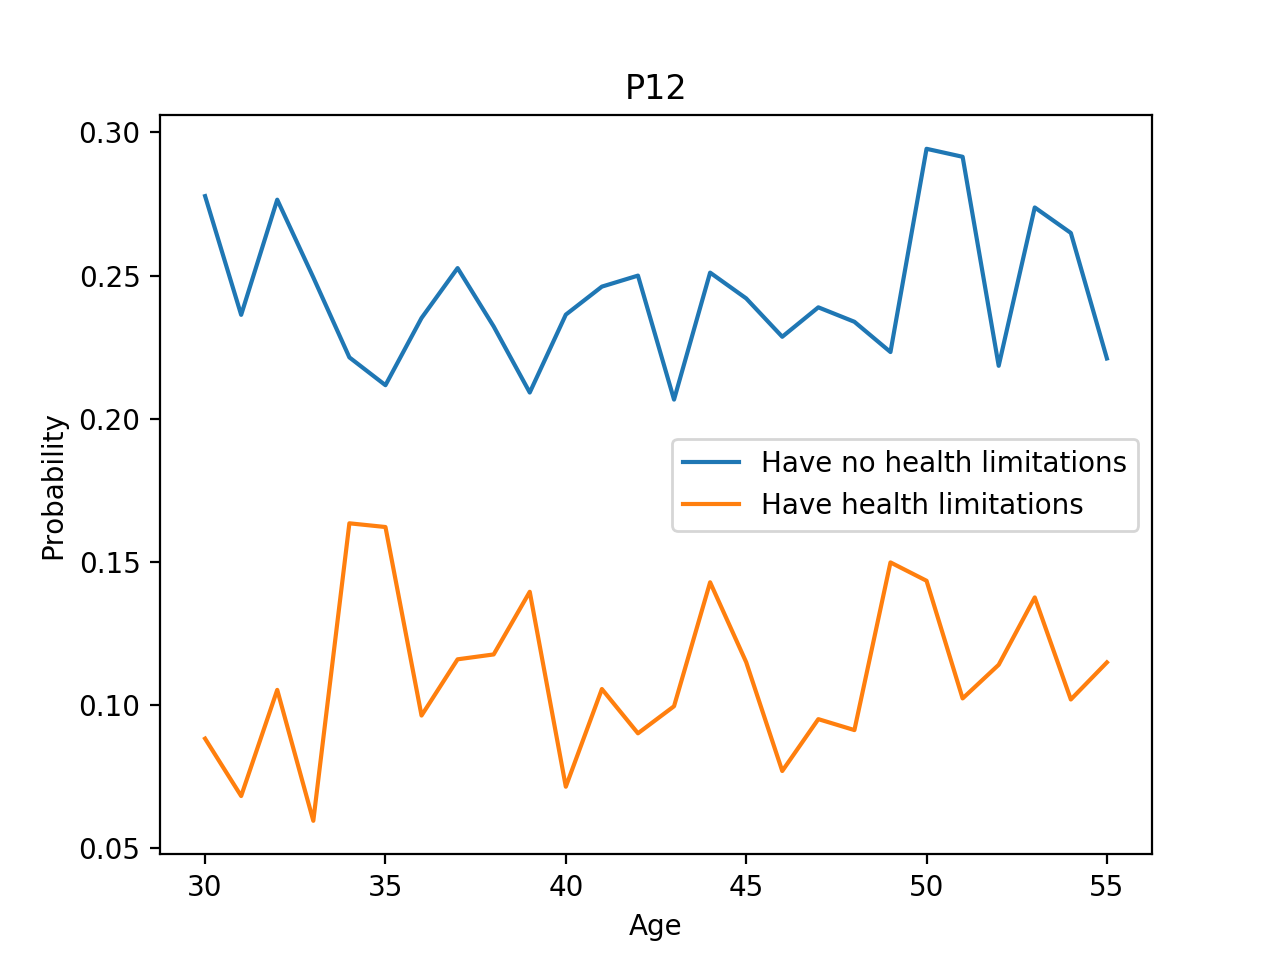

In [98]:
q12hea=[]
q12unhea=[]
for i in markovhea:
    q12hea.append(i[0][1])
for i in markovunhea:
    q12unhea.append(i[0][1])
%matplotlib notebook
plt.plot(age,q12hea,label='Have no health limitations')
plt.plot(age,q12unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P12')
plt.legend()

<IPython.core.display.Javascript object>


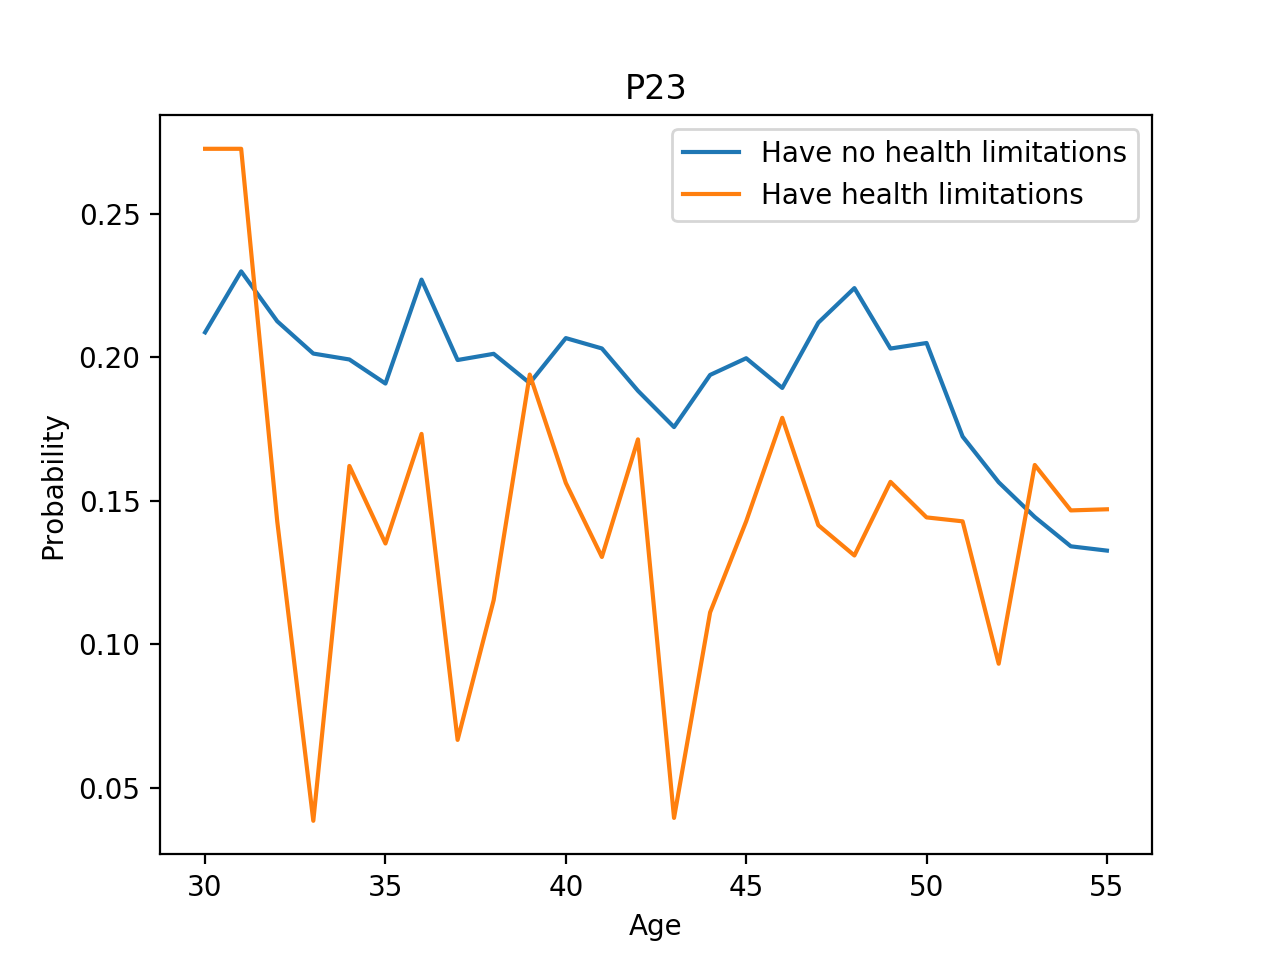

In [99]:
q23hea=[]
q23unhea=[]
for i in markovhea:
    q23hea.append(i[1][2])
for i in markovunhea:
    q23unhea.append(i[1][2])
%matplotlib notebook
plt.plot(age,q23hea,label='Have no health limitations')
plt.plot(age,q23unhea,label='Have health limitations')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P23')
plt.legend()

Finding:
The upward probabilities are much higher for people who do not have health limitations than those who do. In contrast, the people who have health limitations have significantly higher downward probabilities than those who do not have.

## Conclusion:
1. As people get older, their income level becomes more stable.
2. p11 and p44 are much higher than p22 and p33 in all ages, suggesting that the poorest and the wealthiest people have more stable income level than the people whose income level is in the middle.
3. p22 and p33 increase more dramatically than p11 and p44.
4. The reason why pxx's decrease in age is that the probability of upward movements decrease in age.
4. The probability of downward movements remain roughly constant in age.
4. The probabilities of black people's downward movements are much higher than that of non-black and non-hispanic people. (i.e., Black people are much more likely to have lower income than non-black non-hispanic people in the next year even if they have the same income level this year.)
5. The hispanic people's downward probabilities are between the black and the non-black and non-hispanic people.
6. For upward probabilities, the trends are just the reverse. That is, black people have the lowest upward probabilities. Non-black and non-hispanic people have the highest upward probabilities.
7. The probabilities of downward movements are much higher for people who did not attend college compared to those who had some college education (i.e., The people who have college education are much less likely to have lower income than those who do not in the next year even if they have the same income level this year). The trends for upward movements are exactly the opposite.
8. The upward probabilities are much higher for people who do not have health limitations than those who do. In contrast, the people who have health limitations have significantly higher downward probabilities than those who do not have.
9. That is, income transition (both upward and downward)  probabilities are largely correlated with a person's race, educational level, and health condition.
10. The income transition probabilities do not show clear correlation with a person's gender, whether living in urban or rural areas, whether having more than one child.